## Data_Visualization

### 주제 - 류현진을 중심으로 투수의 특성 & 환경 변수가 야구에 미치는 영향 시각화

### 가설 
#### [류현진으로 보는 투수의 특성] 
    1. 류현진은 mlb시절 보더라인에 걸치는 공을 많이 던졌다.
        1-1. 보더라인에 걸친 공들 중 스트라이크의 비율이 더 높을 것이다.
        1-2. 몸쪽 공도 스트라이크 비율이 월등히 높을 것이다. 
    2. 투수는 나이가 들수록 구속이 느려질것이다.
            2-1-1. 류현진의 구속 시각화
            2-1-2. 전체 투수의 구속 시각화
            2-1-3. 주요 투수 3명의 구속 감소 시각화
            2-1-4. 류현진은 나이가 들수록 구속 감소로 인해 구종이 다양해졌을것이다.
            2-1-5. 커터 도입 이루 포심의 구속은 줄었을 것이다
        2-2. 구속이 빠른 선수는 직구의 비율이 높다.
    3. 중앙으로 몰린 공이 홈런으로 이어질 가능성이 크다.
    
#### [ 환경 변수가 야구에 미치는 영향 ]
    1. 날씨가 맑을 수록 총 점수가 많이 날 것이다.
        1-1. 온도가 평이할 수록 총 점수가 많이 날 것이다.
        1-2. 낮 경기가 경기 시간이 더 길 것이다.
    2. 바람의 강도와 방향은 출루에 영향을 줄 것이다. 
        2-1. 좌익수로부터 불어오는 풍향에서의 출루율은 우타자와의 몸쪽 공 승부와 관련이 있다.

### 데이터 출처
2015-2018 mlb 투수 데이터셋: https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018

### 데이터 정보
- 2015-2018시즌 mlb 투수 데이터셋
    - 2015~2018 투수 데이터(piches.csv)
        - ab_id: at-bat ID
        - px: 피치가 플레이트를 가로지르는 x 위치 (X=0은 바로 중앙을 의미 ,단위: feet)
        - pz: 피치가 플레이트를 가로지르는 z 위치. (Z=0은 접지(the ground)를 의미, 단위: feet)
        - start_speed: 던지는 순간의 투구 속도
        - end_speed: 투구가 플레이트에 도달할 때의 속도
        - pitch_type: 구종
        - b_count: 현재 시점의 볼 카운트
        - s_count: 현재 시점의 스트라이크 카운드
    - 2015~2018 게임 데이터(games.csv)
        - g_id: 게임 아이디(atbats와 연결)
        - weather: 날씨(온도, 날씨)
        - home_final_score: 홈팀 최종 점수
        - away_final_score: 어웨이팀 최종 점수
        - elapsed_time: 게임의 길이, 단위: min
        - wind: 바람에 대한 내용(풍속, 풍향)
    - atbats 데이터(atbats.csv)
        - pitcher_id: 투수 ID
        - event: 일어난 이벤트(삼진, 안타, 홈런 ...)
    - 선수 이름 데이터(player_names.csv)
        - id: 선수 ID
        - first_name
        - last_name

In [1]:
## 폰트 설정

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns

from plotly.subplots import make_subplots

from matplotlib import font_manager
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# NanumGothic
fe_nanum = fm.FontEntry(
    fname='/Users/icebear/Desktop/workspace/sj-saai-peer/client/src/assets/fonts/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe_nanum)

# DejaVu Sans
fe_dejavu = fm.FontEntry(
    fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
    name='DejaVuSans')
fm.fontManager.ttflist.insert(1, fe_dejavu)

plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic, DejaVuSans'})
plt.rcParams['axes.unicode_minus'] = False


## 데이터 불러오기

In [34]:
# 2015~2018 투수 데이터(pitches.csv)
DATA_DIR = "/Users/icebear/Desktop/workspace/ML-study"
pitches_data_url = os.path.join(DATA_DIR, "pitches.csv")
df_pitches = pd.read_csv(pitches_data_url)
df_pitches.head(5)

px     pz  start_speed  end_speed  spin_rate  spin_dir  break_angle  \
0  0.416  2.963         92.9       84.1   2305.052   159.235        -25.0   
1 -0.191  2.347         92.8       84.1   2689.935   151.402        -40.7   
2 -0.518  3.284         94.1       85.2   2647.972   145.125        -43.7   
3 -0.641  1.221         91.0       84.0   1289.590   169.751         -1.3   
4 -1.821  2.083         75.4       69.6   1374.569   280.671         18.4   

   break_length  break_y      ax      ay      az  sz_bot  sz_top  \
0           3.2     23.7   7.665  34.685 -11.960    1.72    3.56   
1           3.4     23.7  12.043  34.225 -10.085    1.72    3.56   
2           3.7     23.7  14.368  35.276 -11.560    1.72    3.56   
3           5.0     23.8   2.104  28.354 -20.540    1.74    3.35   
4          12.0     23.8 -10.280  21.774 -34.111    1.72    3.56   

   type_confidence    vx0      vy0    vz0           x     x0           y  \
0              2.0 -6.409 -136.065 -3.995  101.140000  2.280  158.780000   
1              2.0 -8.411 -135.690 -5.980  124.280000  2.119  175.410000   
2              2.0 -9.802 -137.668 -3.337  136.740000  2.127  150.110000   
3              2.0 -8.071 -133.005 -6.567  109.685636  2.279  187.463482   
4              2.0 -6.309 -110.409  0.325  146.527525  2.179  177.242829   

     y0     z0  pfx_x  pfx_z  nasty  zone code type pitch_type  event_num  \
0  50.0  5.302   4.16  10.93   55.0   3.0    C    S         FF          3   
1  50.0  5.307   6.57  12.00   31.0   5.0    S    S         FF          4   
2  50.0  5.313   7.61  10.88   49.0   1.0    F    S         FF          5   
3  50.0  5.210   1.17   6.45   41.0  13.0    B    B         FF          6   
4  50.0  5.557  -8.43  -1.65   18.0  13.0    B    B         CU          7   

   b_score         ab_id  b_count  s_count  outs  pitch_num  on_1b  on_2b  \
0      0.0  2.015000e+09      0.0      0.0   0.0        1.0    0.0    0.0   
1      0.0  2.015000e+09      0.0      1.0   0.0        2.0    0.0    0.0   
2      0.0  2.015000e+09      0.0      2.0   0.0        3.0    0.0    0.0   
3      0.0  2.015000e+09      0.0      2.0   0.0        4.0    0.0    0.0   
4      0.0  2.015000e+09      1.0      2.0   0.0        5.0    0.0    0.0   

   on_3b  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

In [3]:
# 2015~2018 게임 데이터(games.csv)
DATA_DIR = "/Users/icebear/Desktop/workspace/ML-study"
games_data_url = os.path.join(DATA_DIR, "games.csv")
df_games = pd.read_csv(games_data_url)
df_games.head(5)

attendance  away_final_score away_team        date  elapsed_time  \
0       35055                 3       sln  2015-04-05           184   
1       45909                 1       ana  2015-04-06           153   
2       36969                 2       atl  2015-04-06           156   
3       31042                 6       bal  2015-04-06           181   
4       45549                 8       bos  2015-04-06           181   

        g_id  home_final_score home_team start_time    umpire_1B  \
0  201500001                 0       chn    7:17 PM  Mark Wegner   
1  201500002                 4       sea    1:12 PM    Ron Kulpa   
2  201500003                 1       mia    4:22 PM     Laz Diaz   
3  201500004                 2       tba    3:12 PM    Ed Hickox   
4  201500005                 0       phi    3:08 PM   Phil Cuzzi   

        umpire_2B        umpire_3B      umpire_HP          venue_name  \
0    Marty Foster  Mike Muchlinski   Mike Winters       Wrigley Field   
1    Brian Knight    Vic Carapazza  Larry Vanover        Safeco Field   
2  Chris Guccione      Cory Blaser    Jeff Nelson        Marlins Park   
3     Paul Nauert   Mike Estabrook    Dana DeMuth     Tropicana Field   
4   Tony Randazzo      Will Little    Gerry Davis  Citizens Bank Park   

                     weather                wind  delay  
0          44 degrees, clear   7 mph, In from CF      0  
1         54 degrees, cloudy       1 mph, Varies      0  
2  80 degrees, partly cloudy  16 mph, In from CF     16  
3           72 degrees, dome         0 mph, None      0  
4  71 degrees, partly cloudy   11 mph, Out to RF      0

In [4]:
# 2019 투수 데이터(2019_atbats.csv)
DATA_DIR = "/Users/icebear/Desktop/workspace/ML-study"
nineteen_atbats_data_url = os.path.join(DATA_DIR, "2019_atbats.csv")
df_nineteen_atbats = pd.read_csv(nineteen_atbats_data_url)
df_nineteen_atbats.head(5)

inning  top         ab_id         g_id  p_score  batter_id  pitcher_id  \
0     1.0  1.0  2.019000e+09  201900001.0      0.0     594777      571666   
1     1.0  1.0  2.019000e+09  201900001.0      0.0     545361      571666   
2     1.0  1.0  2.019000e+09  201900001.0      0.0     571506      571666   
3     1.0  0.0  2.019000e+09  201900001.0      0.0     543257      502239   
4     1.0  0.0  2.019000e+09  201900001.0      0.0     656305      502239   

  stand p_throws      event  o  
0     L        R     Flyout  1  
1     R        R     Flyout  2  
2     L        R  Groundout  3  
3     L        R     Single  0  
4     R        R     Flyout  1

In [5]:
# atbats 데이터(atbats.csv)
DATA_DIR = "/Users/icebear/Desktop/workspace/ML-study"
atbats_data_url = os.path.join(DATA_DIR, "atbats.csv")
df_atbats = pd.read_csv(atbats_data_url)
df_atbats.head(5)

ab_id  batter_id      event       g_id  inning  o  p_score p_throws  \
0  2015000001     572761  Groundout  201500001       1  1        0        L   
1  2015000002     518792     Double  201500001       1  1        0        L   
2  2015000003     407812     Single  201500001       1  1        0        L   
3  2015000004     425509  Strikeout  201500001       1  2        0        L   
4  2015000005     571431  Strikeout  201500001       1  3        0        L   

   pitcher_id stand   top  
0      452657     L  True  
1      452657     L  True  
2      452657     R  True  
3      452657     R  True  
4      452657     L  True

In [6]:
# 선수 이름 데이터(player_names.csv)
DATA_DIR = "/Users/icebear/Desktop/workspace/ML-study"
player_names_data_url = os.path.join(DATA_DIR, "player_names.csv")
df_player_names = pd.read_csv(player_names_data_url)
df_player_names.head(5)

id first_name   last_name
0  452657        Jon      Lester
1  425794       Adam  Wainwright
2  457435       Phil        Coke
3  435400      Jason       Motte
4  519166       Neil     Ramirez

## 데이터 전처리

### piches.csv

In [35]:
## 데이터 프레임 크기, 변수 확인
df_pitches.info()

## 모든 중복된 값 삭제
df_pitches.drop_duplicates()
df_pitches.drop(columns = ['spin_rate', 'spin_rate', 'spin_dir', 'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot', 'sz_top'], inplace=True) ## 필요없는 행 삭제

## 결측치 확인 -> 제거
missing_count = df_pitches.isnull().sum()
missing_ratio = (missing_count / len(df_pitches)) * 100

print("결측치 비율:", missing_ratio)
df_pitches.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867154 entries, 0 to 2867153
Data columns (total 40 columns):
 #   Column           Dtype  
---  ------           -----  
 0   px               float64
 1   pz               float64
 2   start_speed      float64
 3   end_speed        float64
 4   spin_rate        float64
 5   spin_dir         float64
 6   break_angle      float64
 7   break_length     float64
 8   break_y          float64
 9   ax               float64
 10  ay               float64
 11  az               float64
 12  sz_bot           float64
 13  sz_top           float64
 14  type_confidence  float64
 15  vx0              float64
 16  vy0              float64
 17  vz0              float64
 18  x                float64
 19  x0               float64
 20  y                float64
 21  y0               float64
 22  z0               float64
 23  pfx_x            float64
 24  pfx_z            float64
 25  nasty            float64
 26  zone             float64
 27  code        

### games.csv

In [8]:
## 데이터 프레임 크기, 변수 확인
df_games.info()

## 모든 중복된 값 삭제
df_games.drop_duplicates()
df_games.drop(columns = ['attendance', 'umpire_1B' ,'umpire_2B', 'umpire_3B', 'umpire_HP', 'delay'], inplace=True)

## 결측치 확인 -> 결측치 없음
missing_count = df_games.isnull().sum()
missing_ratio = (missing_count / len(df_games)) * 100
missing_ratio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   attendance        9718 non-null   int64 
 1   away_final_score  9718 non-null   int64 
 2   away_team         9718 non-null   object
 3   date              9718 non-null   object
 4   elapsed_time      9718 non-null   int64 
 5   g_id              9718 non-null   int64 
 6   home_final_score  9718 non-null   int64 
 7   home_team         9718 non-null   object
 8   start_time        9718 non-null   object
 9   umpire_1B         9718 non-null   object
 10  umpire_2B         9715 non-null   object
 11  umpire_3B         9718 non-null   object
 12  umpire_HP         9718 non-null   object
 13  venue_name        9718 non-null   object
 14  weather           9718 non-null   object
 15  wind              9718 non-null   object
 16  delay             9718 non-null   int64 
dtypes: int64(6), o

away_final_score    0.0
away_team           0.0
date                0.0
elapsed_time        0.0
g_id                0.0
home_final_score    0.0
home_team           0.0
start_time          0.0
venue_name          0.0
weather             0.0
wind                0.0
dtype: float64

### 2019_atbats.csv

In [9]:
## 데이터 프레임 크기, 변수 확인
df_nineteen_atbats.info()

## 모든 중복된 값 삭제
df_nineteen_atbats.drop_duplicates()
df_nineteen_atbats.drop(columns = ['o', 'top', 'inning'], inplace=True)

## 결측치 확인 -> 결측치 없음
missing_count = df_nineteen_atbats.isnull().sum()
missing_ratio = (missing_count / len(df_nineteen_atbats)) * 100
missing_ratio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185245 entries, 0 to 185244
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   inning      185245 non-null  float64
 1   top         185245 non-null  float64
 2   ab_id       185245 non-null  float64
 3   g_id        185245 non-null  float64
 4   p_score     185245 non-null  float64
 5   batter_id   185245 non-null  int64  
 6   pitcher_id  185245 non-null  int64  
 7   stand       185245 non-null  object 
 8   p_throws    185245 non-null  object 
 9   event       185245 non-null  object 
 10  o           185245 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 15.5+ MB


ab_id         0.0
g_id          0.0
p_score       0.0
batter_id     0.0
pitcher_id    0.0
stand         0.0
p_throws      0.0
event         0.0
dtype: float64

### atbats.csv

In [10]:
## 데이터 프레임 크기, 변수 확인
df_atbats.info()

## 모든 중복된 값 삭제
df_atbats.drop_duplicates()
df_atbats.drop(columns = ['o', 'top', 'inning'], inplace=True)

## 결측치 확인 -> 결측치 없음
missing_count = df_atbats.isnull().sum()
missing_ratio = (missing_count / len(df_atbats)) * 100
missing_ratio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740389 entries, 0 to 740388
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ab_id       740389 non-null  int64 
 1   batter_id   740389 non-null  int64 
 2   event       740389 non-null  object
 3   g_id        740389 non-null  int64 
 4   inning      740389 non-null  int64 
 5   o           740389 non-null  int64 
 6   p_score     740389 non-null  int64 
 7   p_throws    740389 non-null  object
 8   pitcher_id  740389 non-null  int64 
 9   stand       740389 non-null  object
 10  top         740389 non-null  bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 57.2+ MB


ab_id         0.0
batter_id     0.0
event         0.0
g_id          0.0
p_score       0.0
p_throws      0.0
pitcher_id    0.0
stand         0.0
dtype: float64

### player_names.csv

In [11]:
## 데이터 프레임 크기, 변수 확인
df_player_names.info()

## 결측치 확인 -> 결측치 없음
missing_count = df_player_names.isnull().sum()
missing_ratio = (missing_count / len(df_player_names)) * 100
missing_ratio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2218 non-null   int64 
 1   first_name  2218 non-null   object
 2   last_name   2218 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.1+ KB


id            0.0
first_name    0.0
last_name     0.0
dtype: float64

### baseball_reference_2016_clean.csv

## 데이터셋 merge

In [12]:
# df_pitches and df_atbats
df_merge_1 = pd.merge(df_pitches, df_atbats, how = 'left', left_on = 'ab_id', right_on = 'ab_id')
df_merge_1.head()

# df_games
df_merge_2 = pd.merge(df_merge_1, df_games, how = 'left', left_on = 'g_id', right_on = 'g_id')
df_merge_2.head()

# pitcher
df_merged = pd.merge(df_merge_2, df_player_names, how = 'left', left_on = 'pitcher_id', right_on = 'id')
df_merged['p_name'] = df_merged[['first_name', 'last_name']].apply(lambda x: ' '.join(x), axis = 1)
df_merged.drop(['id', 'first_name', 'last_name'], axis = 1, inplace = True)

pd.set_option('display.max_columns', 100)
df_merged.head(5)

px     pz  start_speed  end_speed  type_confidence    vx0      vy0  \
0  0.416  2.963         92.9       84.1              2.0 -6.409 -136.065   
1 -0.191  2.347         92.8       84.1              2.0 -8.411 -135.690   
2 -0.518  3.284         94.1       85.2              2.0 -9.802 -137.668   
3 -0.641  1.221         91.0       84.0              2.0 -8.071 -133.005   
4 -1.821  2.083         75.4       69.6              2.0 -6.309 -110.409   

     vz0           x     x0           y    y0     z0  pfx_x  pfx_z  nasty  \
0 -3.995  101.140000  2.280  158.780000  50.0  5.302   4.16  10.93   55.0   
1 -5.980  124.280000  2.119  175.410000  50.0  5.307   6.57  12.00   31.0   
2 -3.337  136.740000  2.127  150.110000  50.0  5.313   7.61  10.88   49.0   
3 -6.567  109.685636  2.279  187.463482  50.0  5.210   1.17   6.45   41.0   
4  0.325  146.527525  2.179  177.242829  50.0  5.557  -8.43  -1.65   18.0   

   zone code type pitch_type  event_num  b_score         ab_id  b_count  \
0   3.0    C    S         FF          3      0.0  2.015000e+09      0.0   
1   5.0    S    S         FF          4      0.0  2.015000e+09      0.0   
2   1.0    F    S         FF          5      0.0  2.015000e+09      0.0   
3  13.0    B    B         FF          6      0.0  2.015000e+09      0.0   
4  13.0    B    B         CU          7      0.0  2.015000e+09      1.0   

   s_count  outs  pitch_num  on_1b  on_2b  on_3b  batter_id      event  \
0      0.0   0.0        1.0    0.0    0.0    0.0     572761  Groundout   
1      1.0   0.0        2.0    0.0    0.0    0.0     572761  Groundout   
2      2.0   0.0        3.0    0.0    0.0    0.0     572761  Groundout   
3      2.0   0.0        4.0    0.0    0.0    0.0     572761  Groundout   
4      2.0   0.0        5.0    0.0    0.0    0.0     572761  Groundout   

        g_id  p_score p_throws  pitcher_id stand  away_final_score away_team  \
0  201500001        0        L      452657     L                 3       sln   
1  201500001        0        L      452657     L                 3       sln   
2  201500001        0        L      452657     L                 3       sln   
3  201500001        0        L      452657     L                 3       sln   
4  201500001        0        L      452657     L                 3       sln   

         date  elapsed_time  home_final_score home_team start_time  \
0  2015-04-05           184                 0       chn    7:17 PM   
1  2015-04-05           184                 0       chn    7:17 PM   
2  2015-04-05           184                 0       chn    7:17 PM   
3  2015-04-05           184                 0       chn    7:17 PM   
4  2015-04-05           184                 0       chn    7:17 PM   

      venue_name            weather               wind      p_name  
0  Wrigley Field  44 degrees, clear  7 mph, In from CF  Jon Lester  
1  Wrigley Field  44 degrees, clear  7 mph, In from CF  Jon Lester  
2  Wrigley Field  44 degrees, clear  7 mph, In from CF  Jon Lester  
3  Wrigley Field  44 degrees, clear  7 mph, In from CF  Jon Lester  
4  Wrigley Field  44 degrees, clear  7 mph, In from CF  Jon Lester

In [38]:
df_merged.shape

(2847250, 55)

### type 풀네임으로 변경

In [13]:
dict_pitch_arsenal = {
    "CH": "체인지업",
    "CU": "커브볼",
    "EP": "아리랑볼",
    "FC": "커터",
    "FF": "포심 속구",
    "FO": "피치아웃",
    "FS": "스플리터",
    "FT": "투심 속구",
    "IN": "고의 사구",
    "KC": "너클 커브",
    "KN": "너클볼",
    "PO": "피치아웃",
    "SC": "스크루볼",
    "SI": "싱커",
    "SL": "슬라이더",
    "UN": "Unknown"
}
dict_type = {
    "S": "Strike",
    "B": "Ball",
    "X": "In-play"
}


# Palettes
dict_type_palette = {
    "S": "red",
    "Strike": "red",
    "B": "green",
    "Ball": "green",
    "X": "blue",
    "In-play": "blue"
}

## 시각화
## <류현진으로 보는 투수의 특성>
### 1. 류현진은 mlb 시절 스트라이크 존에 걸친 공의 비율이 높다.

- ### 류현진의 공의 분포

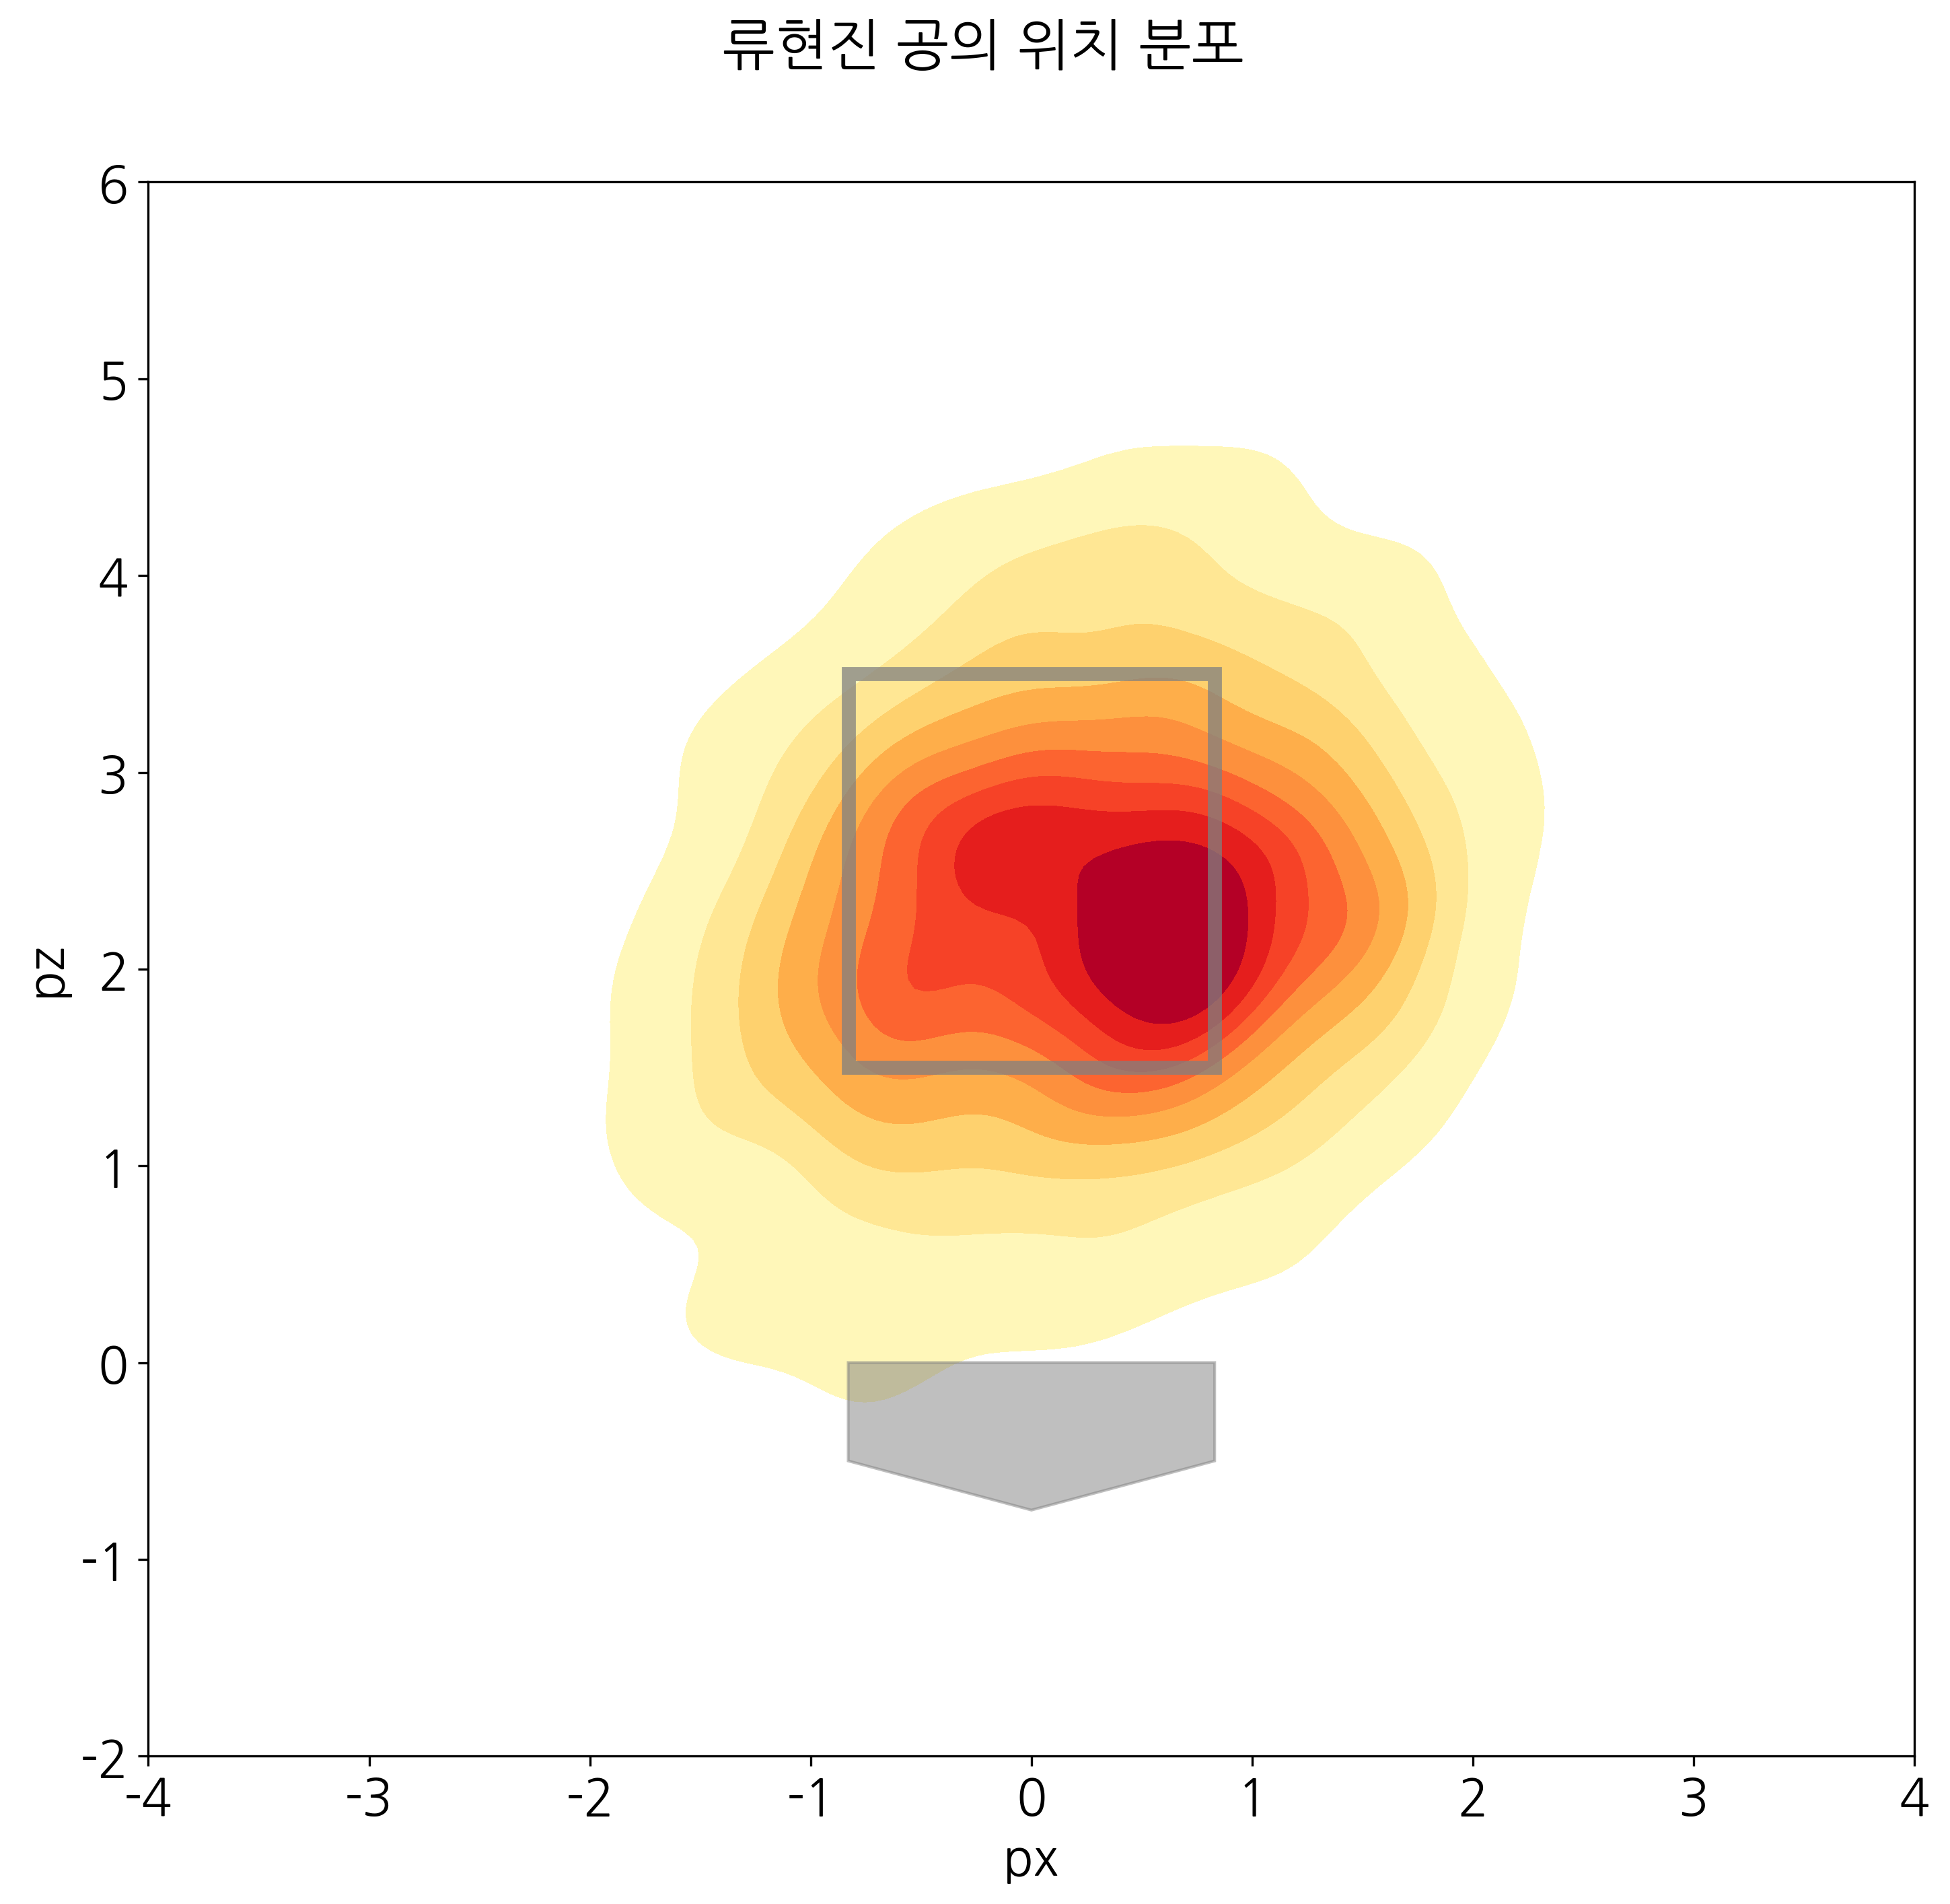

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Rectangle

plt.rcParams['font.family'] = 'NanumGothic'

%matplotlib inline

strike_zone_x = [-0.83, 0.83]
strike_zone_y = [1.5, 3.5]
strike_zone_width = strike_zone_x[1] - strike_zone_x[0]
strike_zone_height = strike_zone_y[1] - strike_zone_y[0]

### kdeplot 시각화 ###
def plot_location_of_pitches_kde(name_pitcher):
    df_analyzing_pitcher = df_merged.loc[df_merged.p_name == name_pitcher]
    
    fig = plt.figure(figsize=(10, 10), dpi=300, facecolor="white")

    layout_plot = (12, 12)
    axes = plt.subplot2grid(layout_plot, (0, 0), rowspan=12, colspan=12)

    # kdeplot, location
    sns.kdeplot(
        data=df_analyzing_pitcher,
        x='px', y='pz',
        cmap='YlOrRd', fill=True,
        ax=axes,
        warn_singular=False
    )

    axes.set_xlim(-4, 4)
    axes.set_ylim(-2, 6)

    axes.set_xticks(range(-4, 5))
    axes.set_yticks(range(-2, 7))

    ## 홈 플레이트 패치
    axes.add_patch(
        plt.Polygon(
            [[0, -0.75],
             [strike_zone_x[1], -0.5],
             [strike_zone_x[1], 0],
             [strike_zone_x[0], 0],
             [strike_zone_x[0], -0.5]],
            color="grey", fill=True,
            alpha=0.5
        )
    )

    # 스트라이크존 패치
    axes.add_patch(
        Rectangle(
            (strike_zone_x[0], strike_zone_y[0]),
            strike_zone_width, strike_zone_height,
            linewidth=5,
            edgecolor='grey', facecolor='none',
            alpha=0.75
        )
    )

    # suptitle
    fig.suptitle(f" 류현진 공의 위치 분포", fontsize=20)

    plt.tight_layout(rect=[0, 0.03, 1, 0.99])
    plt.show()

plot_location_of_pitches_kde("Hyun-Jin Ryu")

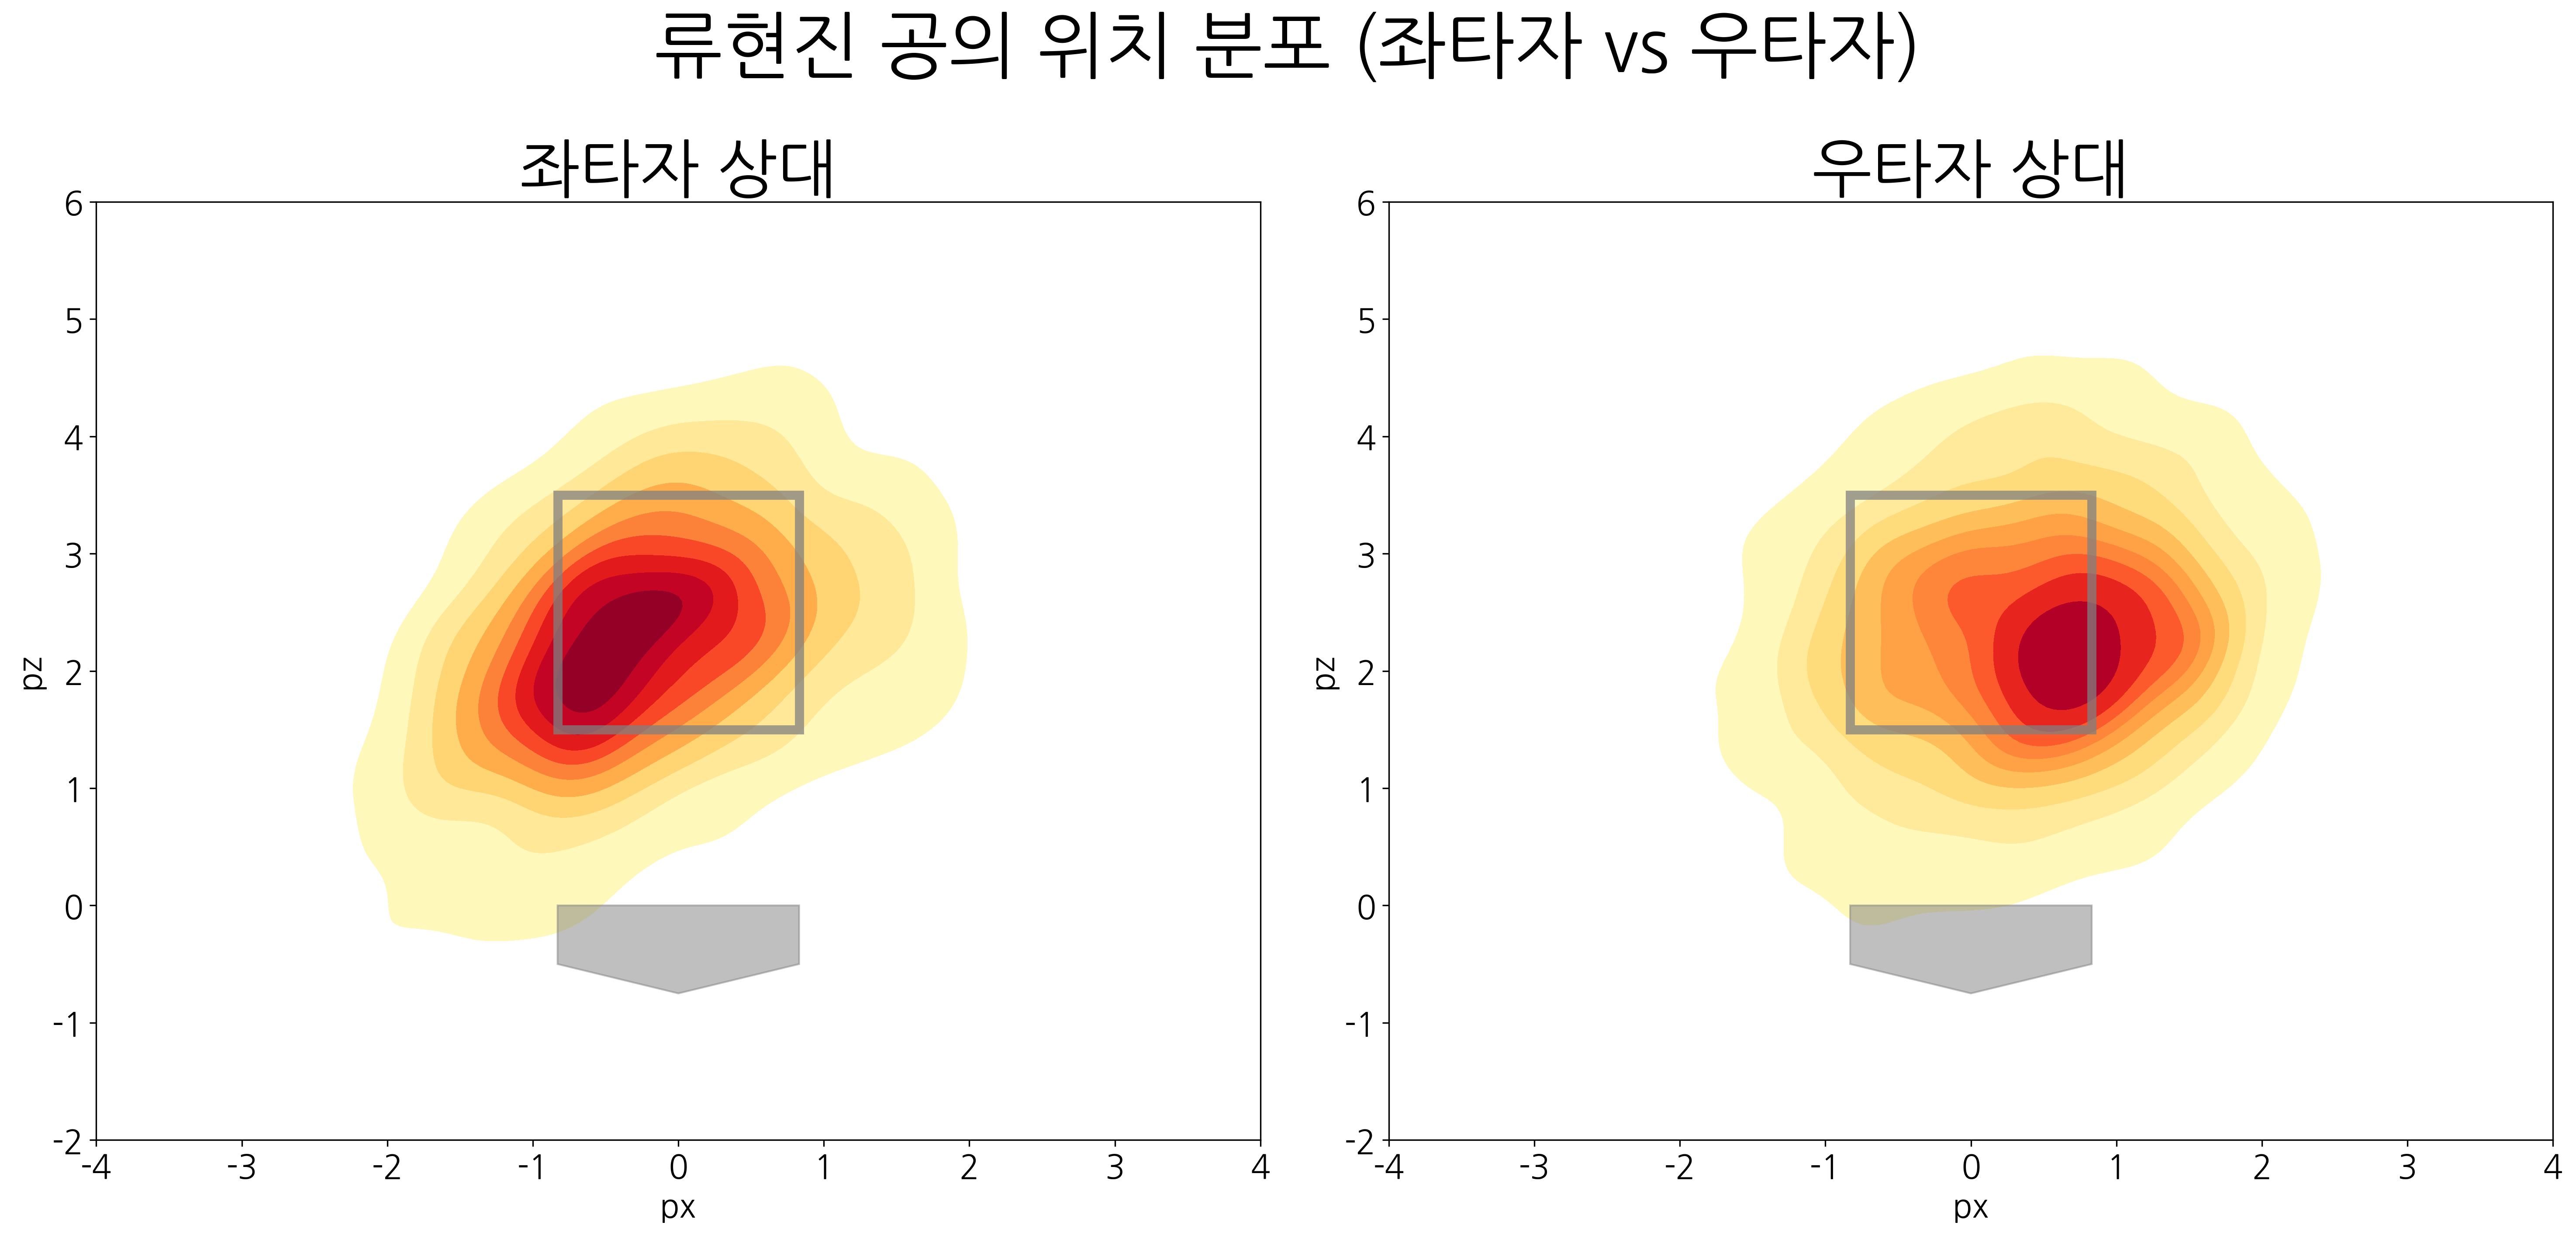

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Rectangle

plt.rcParams['font.family'] = 'NanumGothic'

%matplotlib inline

strike_zone_x = [-0.83, 0.83]
strike_zone_y = [1.5, 3.5]
strike_zone_width = strike_zone_x[1] - strike_zone_x[0]
strike_zone_height = strike_zone_y[1] - strike_zone_y[0]

### kdeplot 시각화 ###
def plot_location_of_pitches_kde(name_pitcher):
    
    df_analyzing_pitcher_l = df_merged.loc[(df_merged.p_name == name_pitcher) & (df_merged.stand == 'L')]
    df_analyzing_pitcher_r = df_merged.loc[(df_merged.p_name == name_pitcher) & (df_merged.stand == 'R')]
    
    fig = plt.figure(figsize=(20, 10), dpi=300, facecolor="white")

    layout_plot = (12, 12)
    axes_l = plt.subplot2grid(layout_plot, (0, 0), rowspan=12, colspan=6)
    axes_r = plt.subplot2grid(layout_plot, (0, 6), rowspan=12, colspan=6)

    # 좌타자 상대 kdeplot
    sns.kdeplot(
        data=df_analyzing_pitcher_l,
        x='px', y='pz',
        cmap='YlOrRd', fill=True,
        ax=axes_l,
        warn_singular=False
    )

    axes_l.set_xlim(-4, 4)
    axes_l.set_ylim(-2, 6)

    axes_l.set_xticks(range(-4, 5))
    axes_l.set_yticks(range(-2, 7))

    ## 좌타자 홈 플레이트 패치
    axes_l.add_patch(
        plt.Polygon(
            [[0, -0.75],
             [strike_zone_x[1], -0.5],
             [strike_zone_x[1], 0],
             [strike_zone_x[0], 0],
             [strike_zone_x[0], -0.5]],
            color="grey", fill=True,
            alpha=0.5
        )
    )

    # 좌타자 스트라이크존 패치
    axes_l.add_patch(
        Rectangle(
            (strike_zone_x[0], strike_zone_y[0]),
            strike_zone_width, strike_zone_height,
            linewidth=5,
            edgecolor='grey', facecolor='none',
            alpha=0.75
        )
    )

    # 우타자 상대 kdeplot
    sns.kdeplot(
        data=df_analyzing_pitcher_r,
        x='px', y='pz',
        cmap='YlOrRd', fill=True,
        ax=axes_r,
        warn_singular=False
    )

    axes_r.set_xlim(-4, 4)
    axes_r.set_ylim(-2, 6)

    axes_r.set_xticks(range(-4, 5))
    axes_r.set_yticks(range(-2, 7))

    ## 우타자 홈 플레이트 패치
    axes_r.add_patch(
        plt.Polygon(
            [[0, -0.75],
             [strike_zone_x[1], -0.5],
             [strike_zone_x[1], 0],
             [strike_zone_x[0], 0],
             [strike_zone_x[0], -0.5]],
            color="grey", fill=True,
            alpha=0.5
        )
    )

    # 우타자 스트라이크존 패치
    axes_r.add_patch(
        Rectangle(
            (strike_zone_x[0], strike_zone_y[0]),
            strike_zone_width, strike_zone_height,
            linewidth=5,
            edgecolor='grey', facecolor='none',
            alpha=0.75
        )
    )

    # suptitle
    fig.suptitle(f"류현진 공의 위치 분포 (좌타자 vs 우타자)", fontsize=40)

    axes_l.set_title('좌타자 상대', fontsize=35)
    axes_r.set_title('우타자 상대', fontsize=35)

    plt.tight_layout(rect=[0, 0.03, 1, 0.99])
    plt.show()

plot_location_of_pitches_kde("Hyun-Jin Ryu")


### 1-1. 류현진이 보더라인에 던진 공 중 스트라이크 판정을 받은 공의 비율이 더 높을 것이다.
- (시각화 2) 류현진이 보더라인에 던진 공 중 스트라이크 판정을 받은 공의 비율

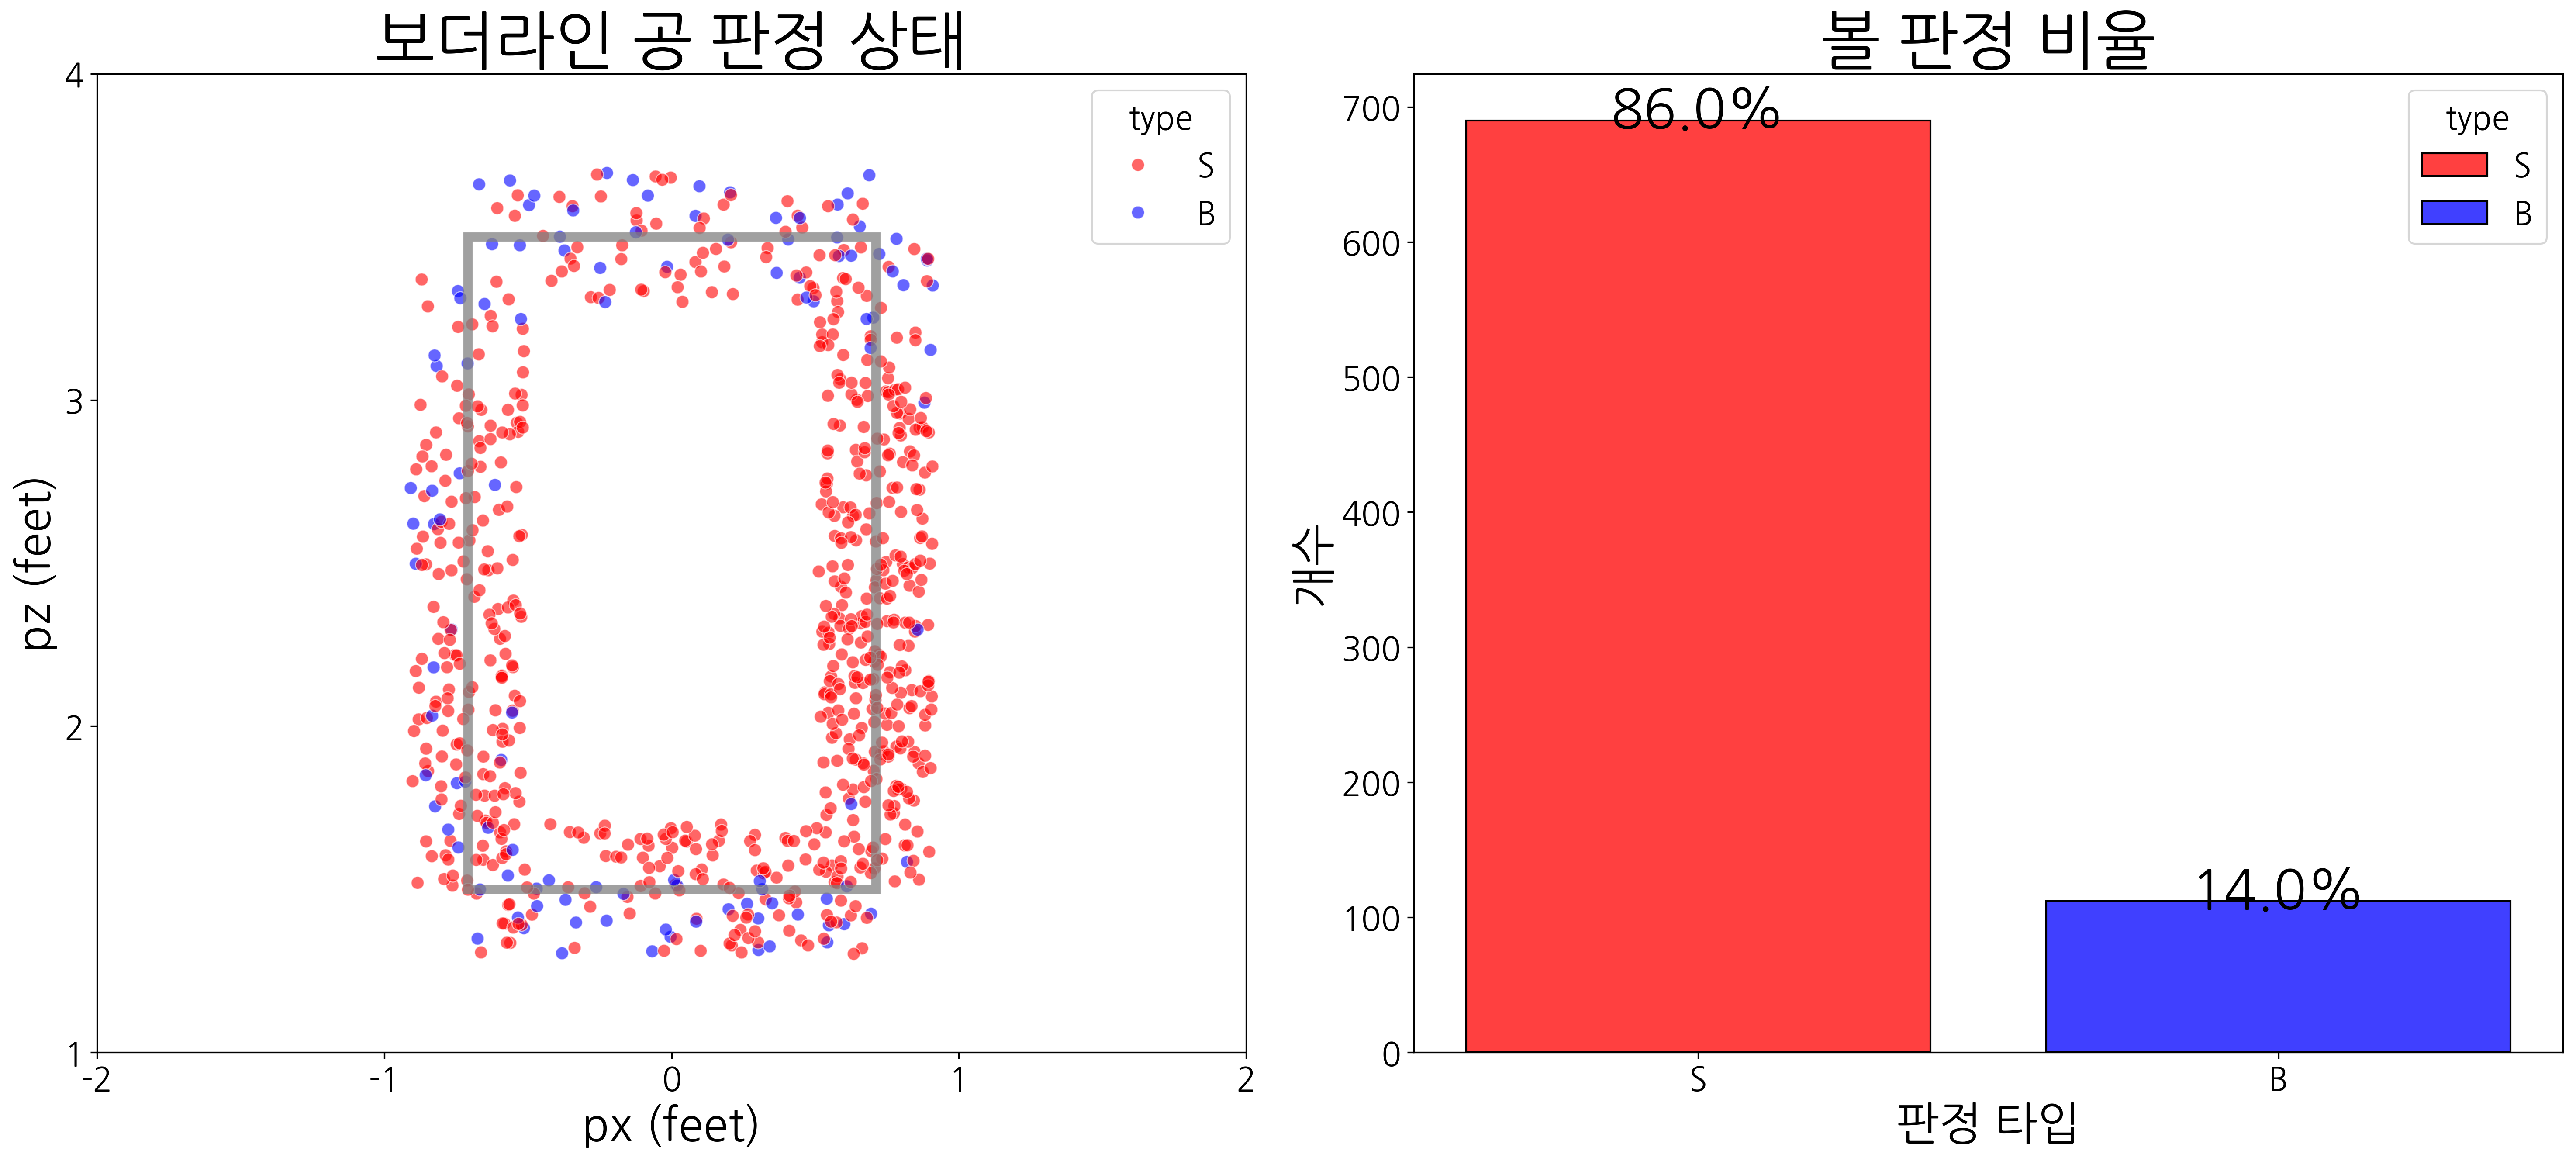

In [16]:
strike_zone_x = [-0.71, 0.71]
strike_zone_y = [1.5, 3.5]
strike_zone_width = strike_zone_x[1] - strike_zone_x[0]
strike_zone_height = strike_zone_y[1] - strike_zone_y[0]

def is_on_strike_zone_line(px, pz, tolerance=0.2):
    return ((strike_zone_x[0] - tolerance <= px <= strike_zone_x[0] + tolerance or
             strike_zone_x[1] - tolerance <= px <= strike_zone_x[1] + tolerance) and
            (strike_zone_y[0] <= pz <= strike_zone_y[1])) or \
           ((strike_zone_y[0] - tolerance <= pz <= strike_zone_y[0] + tolerance or
             strike_zone_y[1] - tolerance <= pz <= strike_zone_y[1] + tolerance) and
            (strike_zone_x[0] <= px <= strike_zone_x[1]))

def plot_rate_of_s(name_pitcher):
    df_analyzing_pitcher = df_merged.loc[df_merged.p_name == name_pitcher].copy()
    df_analyzing_pitcher['on_strike_zone_line'] = df_analyzing_pitcher.apply(lambda row: is_on_strike_zone_line(row['px'], row['pz']), axis=1)
    df_analyzing_pitcher = df_analyzing_pitcher[df_analyzing_pitcher['on_strike_zone_line']]
    df_analyzing_pitcher = df_analyzing_pitcher[df_analyzing_pitcher['type'].isin(['S', 'B'])]
    
    # plot size
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=300, facecolor="white")

    # scatterplot
    sns.scatterplot(
        data=df_analyzing_pitcher,
        x='px', y='pz',
        hue='type',
        palette={'S': 'red', 'B': 'blue'},
        alpha=0.6, s=50,
        ax=axes[0]
    )

    # histplot
    hist = sns.histplot(
        data=df_analyzing_pitcher,
        x='type',
        hue='type',
        multiple='stack',
        palette={'S': 'red', 'B': 'blue'},
        shrink=0.8,
        ax=axes[1]
    )

    total_counts = len(df_analyzing_pitcher)
    for p in hist.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{height / total_counts:.1%}'
            axes[1].annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                             ha='center', va='center', fontsize=30, color='black', xytext=(0, 5),
                             textcoords='offset points')
        
    axes[0].set_xlim(-2, 2)
    axes[0].set_ylim(1, 4)

    axes[0].set_xticks(range(-2, 3))
    axes[0].set_yticks(range(1, 5))

    # patches
    axes[0].add_patch(
        plt.Polygon(
            [[0, -0.75],
             [strike_zone_x[1], -0.5],
             [strike_zone_x[1], 0],
             [strike_zone_x[0], 0],
             [strike_zone_x[0], -0.5]],
            color="grey", fill=True,
            alpha=0.5
        )
    )
    axes[0].add_patch(
        Rectangle(
            (strike_zone_x[0], strike_zone_y[0]),
            strike_zone_width, strike_zone_height,
            linewidth=5,
            edgecolor='grey', facecolor='none',
            alpha=0.75
        )
    )

    axes[0].set_title(f"보더라인 공 판정 상태", fontsize=35)
    axes[0].set_xlabel("px (feet)", fontsize=25)
    axes[0].set_ylabel("pz (feet)", fontsize=25)

    axes[1].set_title("볼 판정 비율", fontsize=35)
    axes[1].set_xlabel("판정 타입", fontsize=25)
    axes[1].set_ylabel("개수", fontsize=25)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plot_rate_of_s("Hyun-Jin Ryu")

### 1-2. 몸쪽 공도 스트라이크 판정의 비율이 월등히 높다.

In [17]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

plt.rcParams['font.family'] = 'NanumGothic'
%matplotlib inline

strike_zone_x = [-0.71, 0.71]
strike_zone_y = [1.5, 3.5]
strike_zone_width = strike_zone_x[1] - strike_zone_x[0]
strike_zone_height = strike_zone_y[1] - strike_zone_y[0]

def is_on_strike_zone_line(px, pz, tolerance=0.2):
    return ((strike_zone_x[0] - tolerance <= px <= strike_zone_x[0] + tolerance or
             strike_zone_x[1] - tolerance <= px <= strike_zone_x[1] + tolerance) and
            (strike_zone_y[0] <= pz <= strike_zone_y[1])) or \
           ((strike_zone_y[0] - tolerance <= pz <= strike_zone_y[0] + tolerance or
             strike_zone_y[1] - tolerance <= pz <= strike_zone_y[1] + tolerance) and
            (strike_zone_x[0] <= px <= strike_zone_x[1]))

def plot_rate_of_s(ax1, ax2, name_pitcher):
    df_analyzing_pitcher = df_merged.loc[df_merged.p_name == name_pitcher].copy()
    df_analyzing_pitcher['on_strike_zone_line'] = df_analyzing_pitcher.apply(lambda row: is_on_strike_zone_line(row['px'], row['pz']), axis=1)
    df_analyzing_pitcher = df_analyzing_pitcher[df_analyzing_pitcher['on_strike_zone_line']]
    df_analyzing_pitcher = df_analyzing_pitcher[df_analyzing_pitcher['type'].isin(['S', 'B'])]
    
    sns.scatterplot(
        data=df_analyzing_pitcher,
        x='px', y='pz',
        hue='type',
        palette={'S': 'red', 'B': 'blue'},
        alpha=0.6, s=50,
        ax=ax1
    )

    hist = sns.histplot(
        data=df_analyzing_pitcher,
        x='type',
        hue='type',
        multiple='stack',
        palette={'S': 'red', 'B': 'blue'},
        shrink=0.8,
        ax=ax2
    )

    total_counts = len(df_analyzing_pitcher)
    for p in hist.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{height / total_counts:.1%}'
            ax2.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                             ha='center', va='center', fontsize=30, color='black', xytext=(0, 5),
                             textcoords='offset points')
        
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(1, 4)

    ax1.set_xticks(range(-2, 3))
    ax1.set_yticks(range(1, 5))

    ax1.add_patch(
        plt.Polygon(
            [[0, -0.75],
             [strike_zone_x[1], -0.5],
             [strike_zone_x[1], 0],
             [strike_zone_x[0], 0],
             [strike_zone_x[0], -0.5]],
            color="grey", fill=True,
            alpha=0.5
        )
    )
    ax1.add_patch(
        Rectangle(
            (strike_zone_x[0], strike_zone_y[0]),
            strike_zone_width, strike_zone_height,
            linewidth=5,
            edgecolor='grey', facecolor='none',
            alpha=0.75
        )
    )

    ax1.set_title("보더라인 공 판정 상태", fontsize=30)
    ax1.set_xlabel("px (feet)", fontsize=15)
    ax1.set_ylabel("pz (feet)", fontsize=15)

    ax2.set_title("볼 판정 비율", fontsize=30)
    ax2.set_xlabel("판정 타입", fontsize=15)
    ax2.set_ylabel("개수", fontsize=15)

def is_inside_body_pitch(px, pz):
    return 0.51 <= px <= 0.91 and 1.5 <= pz <= 3

def plot_body_ball(axes, pitcher):
    df_analyzing_pitcher_r = df_merged.loc[(df_merged.p_name == pitcher) & (df_merged.stand == 'R')].copy()
    df_analyzing_pitcher_r['inside_body_pitch'] = df_analyzing_pitcher_r.apply(lambda row: is_inside_body_pitch(row['px'], row['pz']), axis=1)
    df_analyzing_pitcher_r = df_analyzing_pitcher_r[df_analyzing_pitcher_r['inside_body_pitch']]
    df_analyzing_pitcher_r = df_analyzing_pitcher_r[df_analyzing_pitcher_r['type'].isin(['S', 'B'])]

    df_analyzing_pitcher_l = df_merged.loc[(df_merged.p_name == pitcher) & (df_merged.stand == 'L')].copy()
    df_analyzing_pitcher_l['inside_body_pitch'] = df_analyzing_pitcher_l.apply(lambda row: is_inside_body_pitch(-row['px'], row['pz']), axis=1)
    df_analyzing_pitcher_l = df_analyzing_pitcher_l[df_analyzing_pitcher_l['inside_body_pitch']]
    df_analyzing_pitcher_l = df_analyzing_pitcher_l[df_analyzing_pitcher_l['type'].isin(['S', 'B'])]

    sns.scatterplot(
        data=df_analyzing_pitcher_r,
        x='px', y='pz',
        hue='type',
        palette={'S': 'red', 'B': 'blue'},
        alpha=0.6, s=50,
        ax=axes[0, 0]
    )

    sns.scatterplot(
        data=df_analyzing_pitcher_l,
        x='px', y='pz',
        hue='type',
        palette={'S': 'red', 'B': 'blue'},
        alpha=0.6, s=50,
        ax=axes[1, 0]
    )

    for ax in [axes[0, 0], axes[1, 0]]:
        ax.set_xlim(-2, 2)
        ax.set_ylim(1, 4)
        ax.set_xticks(range(-2, 3))
        ax.set_yticks(range(1, 5))

    axes[0, 0].add_patch(
        Rectangle(
            (0.51, 1.5),
            0.4, 1.5,
            linewidth=2,
            edgecolor='lime', facecolor='none',
            alpha=0.75
        )
    )

    axes[1, 0].add_patch(
        Rectangle(
            (-0.91, 1.5),
            0.4, 1.5,
            linewidth=2,
            edgecolor='lime', facecolor='none',
            alpha=0.75
        )
    )

    for ax in [axes[0, 0], axes[1, 0]]:
        ax.add_patch(
            Rectangle(
                (strike_zone_x[0], strike_zone_y[0]),
                strike_zone_width, strike_zone_height,
                linewidth=5,
                edgecolor='grey', facecolor='none',
                alpha=0.75
            )
        )

    axes[0, 0].set_title(f"{pitcher}의 몸쪽 공 판정 상태(우타자)", fontsize=30)
    axes[0, 0].set_xlabel("px", fontsize=15)
    axes[0, 0].set_ylabel("pz", fontsize=15)

    axes[1, 0].set_title(f"{pitcher}의 몸쪽 공 판정 상태(좌타자)", fontsize=30)
    axes[1, 0].set_xlabel("px", fontsize=15)
    axes[1, 0].set_ylabel("pz", fontsize=15)

    hist_r = sns.histplot(
        data=df_analyzing_pitcher_r,
        x='type',
        hue='type',
        multiple='stack',
        palette={'S': 'red', 'B': 'blue'},
        shrink=0.8,
        ax=axes[0, 1]
    )

    hist_l = sns.histplot(
        data=df_analyzing_pitcher_l,
        x='type',
        hue='type',
        multiple='stack',
        palette={'S': 'red', 'B': 'blue'},
        shrink=0.8,
        ax=axes[1, 1]
    )

    total_counts_r = len(df_analyzing_pitcher_r)
    for p in hist_r.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{height / total_counts_r:.1%}'
            axes[0, 1].annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='center', fontsize=30, color='black', xytext=(0, 5),
                                textcoords='offset points')

    total_counts_l = len(df_analyzing_pitcher_l)
    for p in hist_l.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{height / total_counts_l:.1%}'
            axes[1, 1].annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='center', fontsize=30, color='black', xytext=(0, 5),
                                textcoords='offset points')

    axes[0, 1].set_title("볼 판정 비율(우타자)", fontsize=30)
    axes[0, 1].set_xlabel("판정 타입", fontsize=15)
    axes[0, 1].set_ylabel("개수", fontsize=15)

    axes[1, 1].set_title("볼 판정 비율(좌타자)", fontsize=30)
    axes[1, 1].set_xlabel("판정 타입", fontsize=15)
    axes[1, 1].set_ylabel("개수", fontsize=15)

fig, axes = plt.subplots(3, 2, figsize=(20, 30), dpi=300, facecolor="white")

plot_rate_of_s(axes[0, 0], axes[0, 1], "Hyun-Jin Ryu")
plot_body_ball(axes[1:3, :], "Hyun-Jin Ryu")

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()


## 2. 투수는 나이가 들수록 직구의 구속이 느려질 것이다.
- 직구의 종류: 포심, 투심, 싱커, 커터
### 2-1-1. 류현진의 구속 시각화

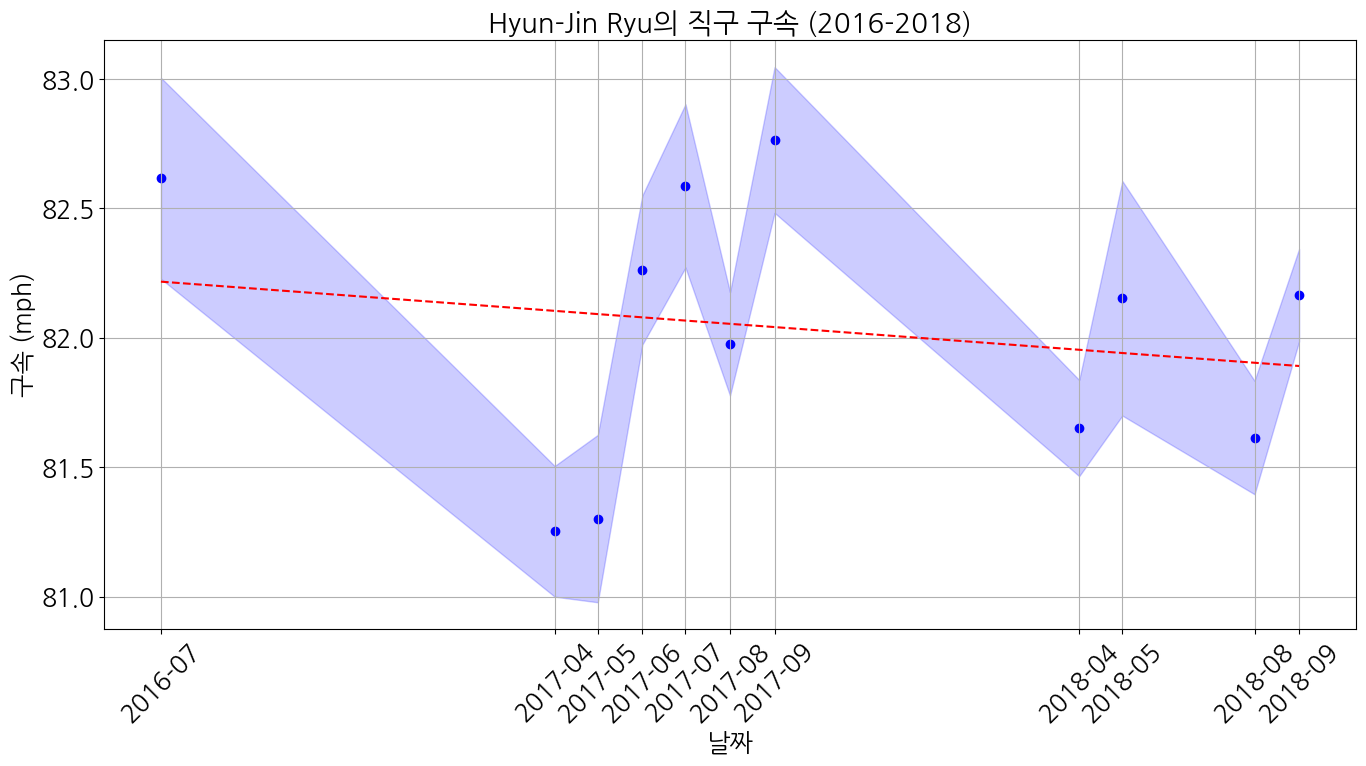

In [18]:
import matplotlib.dates as mdates
from scipy.stats import norm, linregress
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_velocity_over_time(pitcher):
    valid_pitch_types = ['FF', 'FT', 'SI', 'FC'] # 직구 구종 (포심, 투심, 싱커, 커터)
    
    df_analyzing_pitcher = df_merged.loc[df_merged.p_name == pitcher].copy()
    df_analyzing_pitcher['date'] = pd.to_datetime(df_analyzing_pitcher['date'])

    df_analyzing_pitcher = df_analyzing_pitcher[df_analyzing_pitcher['pitch_type'].isin(valid_pitch_types)]
    
    # 비시즌 데이터 제거 (12월~3월)
    df_analyzing_pitcher = df_analyzing_pitcher[~df_analyzing_pitcher['date'].dt.month.isin([12, 1, 2, 3])]
    
    df_analyzing_pitcher.sort_values('date', inplace=True)

    # 월별 구속 평균, 신뢰구간 계산
    df_analyzing_pitcher['month'] = df_analyzing_pitcher['date'].dt.to_period('M')
    df_monthly_stats = df_analyzing_pitcher.groupby('month')['end_speed'].agg(['mean', 'std', 'count']).reset_index()
    df_monthly_stats['month'] = df_monthly_stats['month'].dt.to_timestamp()

    confidence_level = 0.95
    z_value = norm.ppf(0.5 + confidence_level / 2)
    df_monthly_stats['ci_half_width'] = z_value * (df_monthly_stats['std'] / df_monthly_stats['count']**0.5)
    df_monthly_stats['ci_lower'] = df_monthly_stats['mean'] - df_monthly_stats['ci_half_width']
    df_monthly_stats['ci_upper'] = df_monthly_stats['mean'] + df_monthly_stats['ci_half_width']

    # 비시즌을 제외한 x축 눈금 재조정
    df_monthly_stats['numeric_month'] = df_monthly_stats['month'].dt.year * 12 + df_monthly_stats['month'].dt.month
    df_monthly_stats['adjusted_month'] = df_monthly_stats['numeric_month'] - 4 * (df_monthly_stats['month'].dt.year - df_monthly_stats['month'].dt.year.min())

    # 선형 회귀 분석 수행
    slope, intercept, r_value, p_value, std_err = linregress(df_monthly_stats['numeric_month'], df_monthly_stats['mean'])
    trendline = slope * df_monthly_stats['numeric_month'] + intercept

    fig, ax = plt.subplots(figsize=(14, 8))
    
    # 데이터를 점으로 표현
    ax.scatter(df_monthly_stats['month'], df_monthly_stats['mean'], label='구속', color='blue')
    
    # 신뢰구간 영역
    ax.fill_between(df_monthly_stats['month'], df_monthly_stats['ci_lower'], df_monthly_stats['ci_upper'], color='blue', alpha=0.2)
    
    # 추세선
    ax.plot(df_monthly_stats['month'], trendline, linestyle='--', color='red', label='추세선')

    # x축 라벨 재조정
    ticks = df_monthly_stats['month'][df_monthly_stats['month'].dt.month.isin([4, 5, 6, 7, 8, 9, 10])].unique()
    labels = df_monthly_stats['month'][df_monthly_stats['month'].dt.month.isin([4, 5, 6, 7, 8, 9, 10])].dt.strftime('%Y-%m').unique()
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)

    ax.set_title(f'{pitcher}의 직구 구속 (2016-2018)', fontsize=20)
    ax.set_xlabel('날짜')
    ax.set_ylabel('구속 (mph)')
    ax.grid(True)

    plt.tight_layout()
    plt.show()

plot_velocity_over_time("Hyun-Jin Ryu")


### 2-1-2. 전체 투수의 구속 시각화 (류현진 구속 비교)

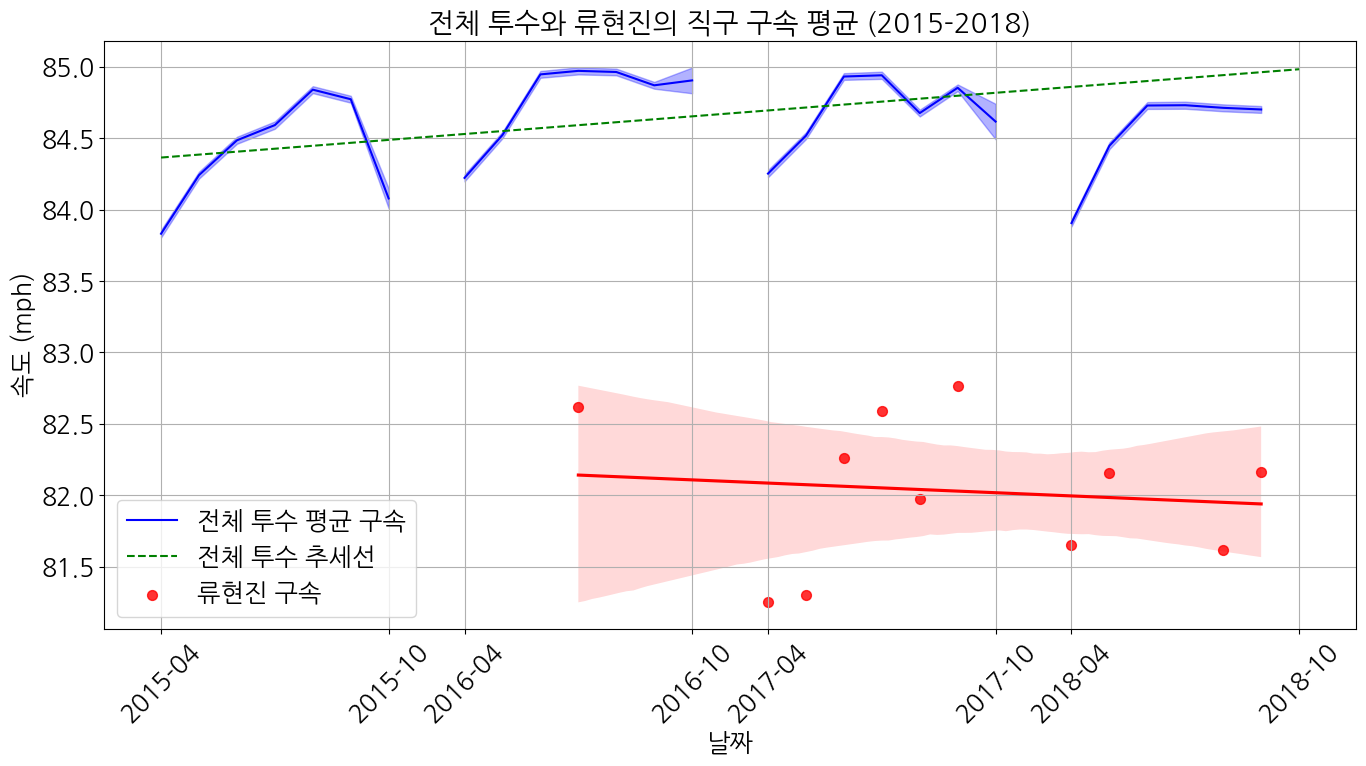

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, linregress
import numpy as np

def plot_velocity_over_time_top_pitchers(df_merged):
    valid_pitch_types = ['FF', 'FT', 'SI', 'FC']  # 직구 구종 (포심, 투심, 싱커, 커터)

    pitchers = df_merged['p_name'].unique()

    df_top_pitchers = df_merged[df_merged['p_name'].isin(pitchers)].copy()
    df_top_pitchers['date'] = pd.to_datetime(df_top_pitchers['date'])
    df_top_pitchers = df_top_pitchers[df_top_pitchers['pitch_type'].isin(valid_pitch_types)]
    df_top_pitchers = df_top_pitchers[~df_top_pitchers['date'].dt.month.isin([12, 1, 2, 3])]
    df_top_pitchers.sort_values('date', inplace=True)

    # 월별 구속 평균, 신뢰구간 계산
    df_top_pitchers['year_month'] = df_top_pitchers['date'].dt.to_period('M')
    df_monthly_stats = df_top_pitchers.groupby('year_month')['end_speed'].agg(['mean', 'std', 'count']).reset_index()
    df_monthly_stats['year_month'] = df_monthly_stats['year_month'].dt.to_timestamp()

    # 신뢰구간 계산
    confidence_level = 0.98
    z_value = norm.ppf(0.5 + confidence_level / 2)
    df_monthly_stats['ci_half_width'] = z_value * (df_monthly_stats['std'] / df_monthly_stats['count']**0.5)
    df_monthly_stats['ci_lower'] = df_monthly_stats['mean'] - df_monthly_stats['ci_half_width']
    df_monthly_stats['ci_upper'] = df_monthly_stats['mean'] + df_monthly_stats['ci_half_width']

    fig, ax = plt.subplots(figsize=(14, 8))

    # 비시즌을 제외한 x축 눈금 재조정
    df_monthly_stats['numeric_month'] = (df_monthly_stats['year_month'].dt.year - df_monthly_stats['year_month'].dt.year.min()) * 8 + (df_monthly_stats['year_month'].dt.month - 4)

    # 연도별로 그래프를 그려서 비시즌 구간을 생략
    for year in df_monthly_stats['year_month'].dt.year.unique():
        yearly_data = df_monthly_stats[df_monthly_stats['year_month'].dt.year == year]
        yearly_data = yearly_data[yearly_data['year_month'] != '2018-10-01']
        sns.lineplot(data=yearly_data, x='numeric_month', y='mean', ax=ax, color='blue', label='전체 투수 평균 구속' if year == df_monthly_stats['year_month'].dt.year.min() else "")
        ax.fill_between(yearly_data['numeric_month'], yearly_data['ci_lower'], yearly_data['ci_upper'], alpha=0.3, color='blue')

    # 전체 데이터를 기반으로 추세선 추가
    slope, intercept, r_value, p_value, std_err = linregress(df_monthly_stats['numeric_month'], df_monthly_stats['mean'])
    trendline = slope * df_monthly_stats['numeric_month'] + intercept
    ax.plot(df_monthly_stats['numeric_month'], trendline, linestyle='--', color='green', label='전체 투수 추세선')

    # 류현진의 구속 데이터 추가
    pitcher = "Hyun-Jin Ryu"
    df_analyzing_pitcher = df_merged.loc[df_merged.p_name == pitcher].copy()
    df_analyzing_pitcher['date'] = pd.to_datetime(df_analyzing_pitcher['date'])
    df_analyzing_pitcher = df_analyzing_pitcher[df_analyzing_pitcher['pitch_type'].isin(valid_pitch_types)]
    df_analyzing_pitcher = df_analyzing_pitcher[~df_analyzing_pitcher['date'].dt.month.isin([12, 1, 2, 3])]
    df_analyzing_pitcher.sort_values('date', inplace=True)

    df_analyzing_pitcher['year_month'] = df_analyzing_pitcher['date'].dt.to_period('M')
    df_monthly_stats_pitcher = df_analyzing_pitcher.groupby('year_month')['end_speed'].agg(['mean', 'std', 'count']).reset_index()
    df_monthly_stats_pitcher['year_month'] = df_monthly_stats_pitcher['year_month'].dt.to_timestamp()

    df_monthly_stats_pitcher['numeric_month'] = (df_monthly_stats_pitcher['year_month'].dt.year - df_monthly_stats['year_month'].dt.year.min()) * 8 + (df_monthly_stats_pitcher['year_month'].dt.month - 4)

    sns.regplot(data=df_monthly_stats_pitcher, x='numeric_month', y='mean', ax=ax, color='red', label='류현진 구속', scatter_kws={'s': 50})

    ticks = df_monthly_stats.loc[df_monthly_stats['year_month'].dt.month.isin([4, 10]), 'numeric_month'].unique()
    labels = df_monthly_stats.loc[df_monthly_stats['year_month'].dt.month.isin([4, 10]), 'year_month'].dt.strftime('%Y-%m').unique()
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)

    ax.set_title('전체 투수와 류현진의 직구 구속 평균 (2015-2018)', fontsize=20)
    ax.set_xlabel('날짜')
    ax.set_ylabel('속도 (mph)')
    ax.grid(True)
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_velocity_over_time_top_pitchers(df_merged)


### 2-1-3. 주요 투수 3명의 구속 감소 시각화
- 투수 라인업: Clayton Kershaw(클레이튼 커쇼, 왕년에 포심 평균 구속이 151로 좌완 선발 정상급), Maxwell Martin Scherzer(맥스 슈어저, 2016 다승1), Zack Greinke(잭 그레인키, 2015 평자 1)

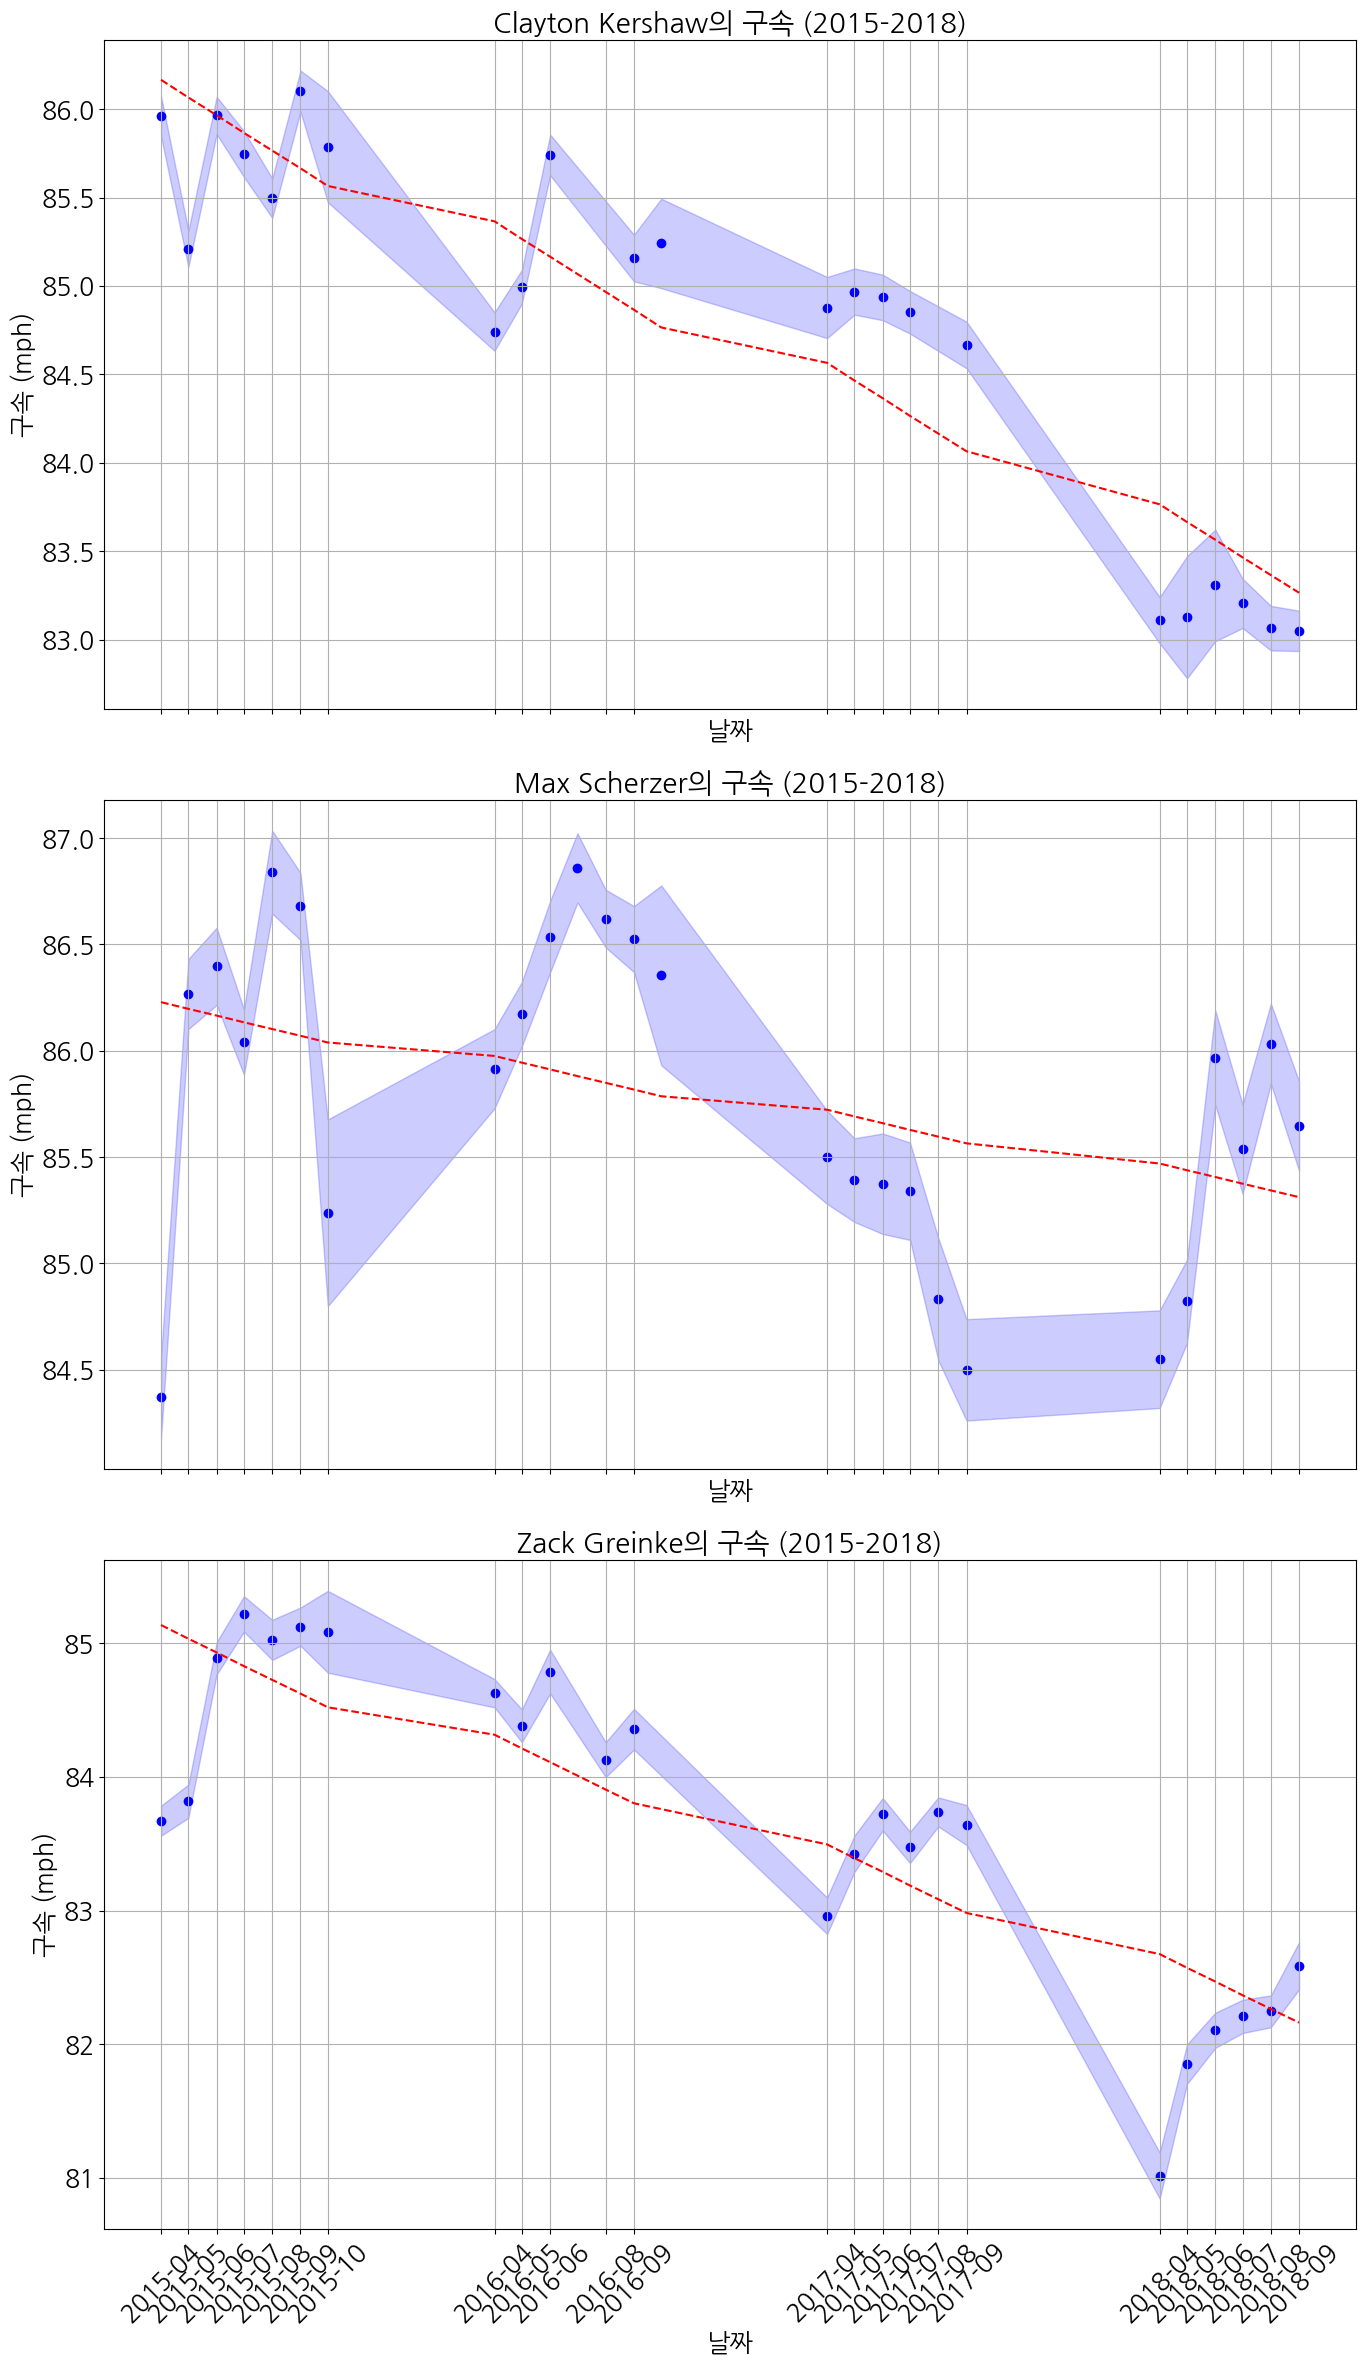

In [20]:
import matplotlib.dates as mdates
from scipy.stats import norm, linregress
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_velocity_over_time(pitchers):
    valid_pitch_types = ['FF', 'FT', 'SI', 'FC']  # 직구 구종

    fig, axes = plt.subplots(len(pitchers), 1, figsize=(14, 8 * len(pitchers)), sharex=True)

    for i, pitcher in enumerate(pitchers):
        ax = axes[i] if len(pitchers) > 1 else axes

        df_analyzing_pitcher = df_merged.loc[df_merged.p_name == pitcher].copy()
        df_analyzing_pitcher['date'] = pd.to_datetime(df_analyzing_pitcher['date'])

        df_analyzing_pitcher = df_analyzing_pitcher[df_analyzing_pitcher['pitch_type'].isin(valid_pitch_types)]
        
        # 비시즌 데이터 제거 (12월~3월)
        df_analyzing_pitcher = df_analyzing_pitcher[~df_analyzing_pitcher['date'].dt.month.isin([12, 1, 2, 3])]
        
        df_analyzing_pitcher.sort_values('date', inplace=True)

        # 월별 구속 평균, 신뢰구간 계산
        df_analyzing_pitcher['month'] = df_analyzing_pitcher['date'].dt.to_period('M')
        df_monthly_stats = df_analyzing_pitcher.groupby('month')['end_speed'].agg(['mean', 'std', 'count']).reset_index()
        df_monthly_stats['month'] = df_monthly_stats['month'].dt.to_timestamp()

        # 신뢰구간 계산
        confidence_level = 0.95
        z_value = norm.ppf(0.5 + confidence_level / 2)
        df_monthly_stats['ci_half_width'] = z_value * (df_monthly_stats['std'] / df_monthly_stats['count']**0.5)
        df_monthly_stats['ci_lower'] = df_monthly_stats['mean'] - df_monthly_stats['ci_half_width']
        df_monthly_stats['ci_upper'] = df_monthly_stats['mean'] + df_monthly_stats['ci_half_width']

        # 비시즌을 제외한 x축 눈금 재조정
        df_monthly_stats['numeric_month'] = df_monthly_stats['month'].dt.year * 12 + df_monthly_stats['month'].dt.month
        df_monthly_stats['adjusted_month'] = df_monthly_stats['numeric_month'] - 4 * (df_monthly_stats['month'].dt.year - df_monthly_stats['month'].dt.year.min())

        # 선형 회귀 분석 수행
        slope, intercept, r_value, p_value, std_err = linregress(df_monthly_stats['adjusted_month'], df_monthly_stats['mean'])
        trendline = slope * df_monthly_stats['adjusted_month'] + intercept

        # 데이터를 점으로 표현
        ax.scatter(df_monthly_stats['month'], df_monthly_stats['mean'], label=f'{pitcher} 구속', color='blue')
        
        # 신뢰구간 영역
        ax.fill_between(df_monthly_stats['month'], df_monthly_stats['ci_lower'], df_monthly_stats['ci_upper'], color='blue', alpha=0.2)
        
        # 추세선
        ax.plot(df_monthly_stats['month'], trendline, linestyle='--', color='red', label=f'{pitcher} 추세선')

        # x축 라벨 재조정
        ticks = df_monthly_stats['month'][df_monthly_stats['month'].dt.month.isin([4, 5, 6, 7, 8, 9, 10])].unique()
        labels = df_monthly_stats['month'][df_monthly_stats['month'].dt.month.isin([4, 5, 6, 7, 8, 9, 10])].dt.strftime('%Y-%m').unique()
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels, rotation=45)

        ax.set_title(f'{pitcher}의 구속 (2015-2018)', fontsize=20)
        ax.set_xlabel('날짜')
        ax.set_ylabel('구속 (mph)')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

name_pitcher = ["Clayton Kershaw", "Max Scherzer", "Zack Greinke"]
plot_velocity_over_time(name_pitcher)


### 2-1-4. 류현진은 나이가 들수록 구속 감소로 인해 구종이 다양해 졌을 것이다. 

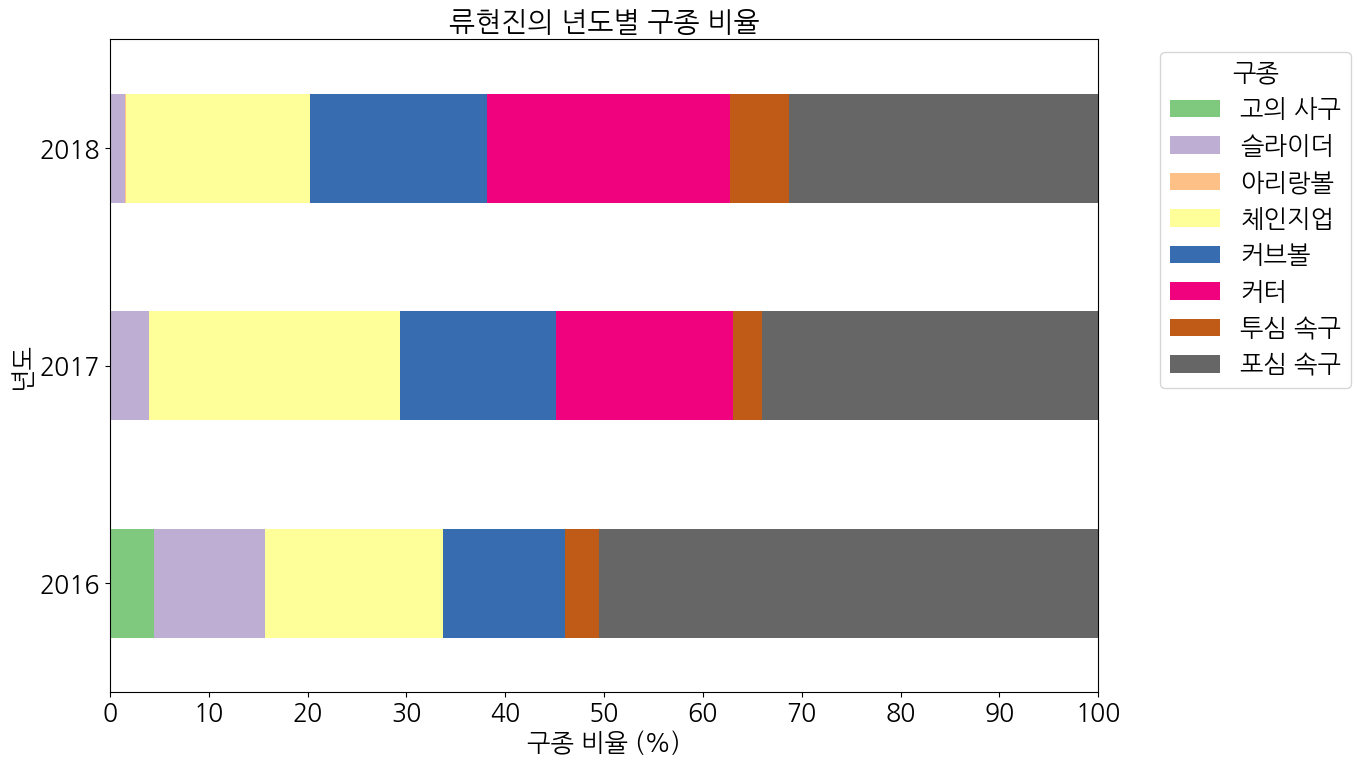

In [21]:
from matplotlib.ticker import MaxNLocator

def rate_of_pitch_type(name_pitcher):
    df_analyzing_pitcher = df_merged.loc[df_merged.p_name == name_pitcher].copy()
    df_analyzing_pitcher.loc[:, 'year'] = pd.to_datetime(df_analyzing_pitcher.loc[:, 'date']).dt.year

    # 구종 이름 변경
    df_analyzing_pitcher['pitch_type'] = df_analyzing_pitcher['pitch_type'].map(dict_pitch_arsenal)
    
    df_pitch_type_year = df_analyzing_pitcher.groupby(['year', 'pitch_type']).size().unstack(fill_value=0)

    # 구종 비율 계산
    df_pitch_type_year_ratio = df_pitch_type_year.div(df_pitch_type_year.sum(axis=1), axis=0) * 100

    fig, ax = plt.subplots(figsize=(14, 8))
    df_pitch_type_year_ratio.plot(kind='barh', stacked=True, ax=ax, colormap='Accent')

    ax.set_title('류현진의 년도별 구종 비율', fontsize=20)
    ax.set_xlabel('구종 비율 (%)')
    ax.set_ylabel('년도')
    ax.set_xlim(0, 100)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='구종', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

rate_of_pitch_type("Hyun-Jin Ryu")

### 2-1-5. 커터 도입 이후 포심의 구속은 줄었을 것이다.

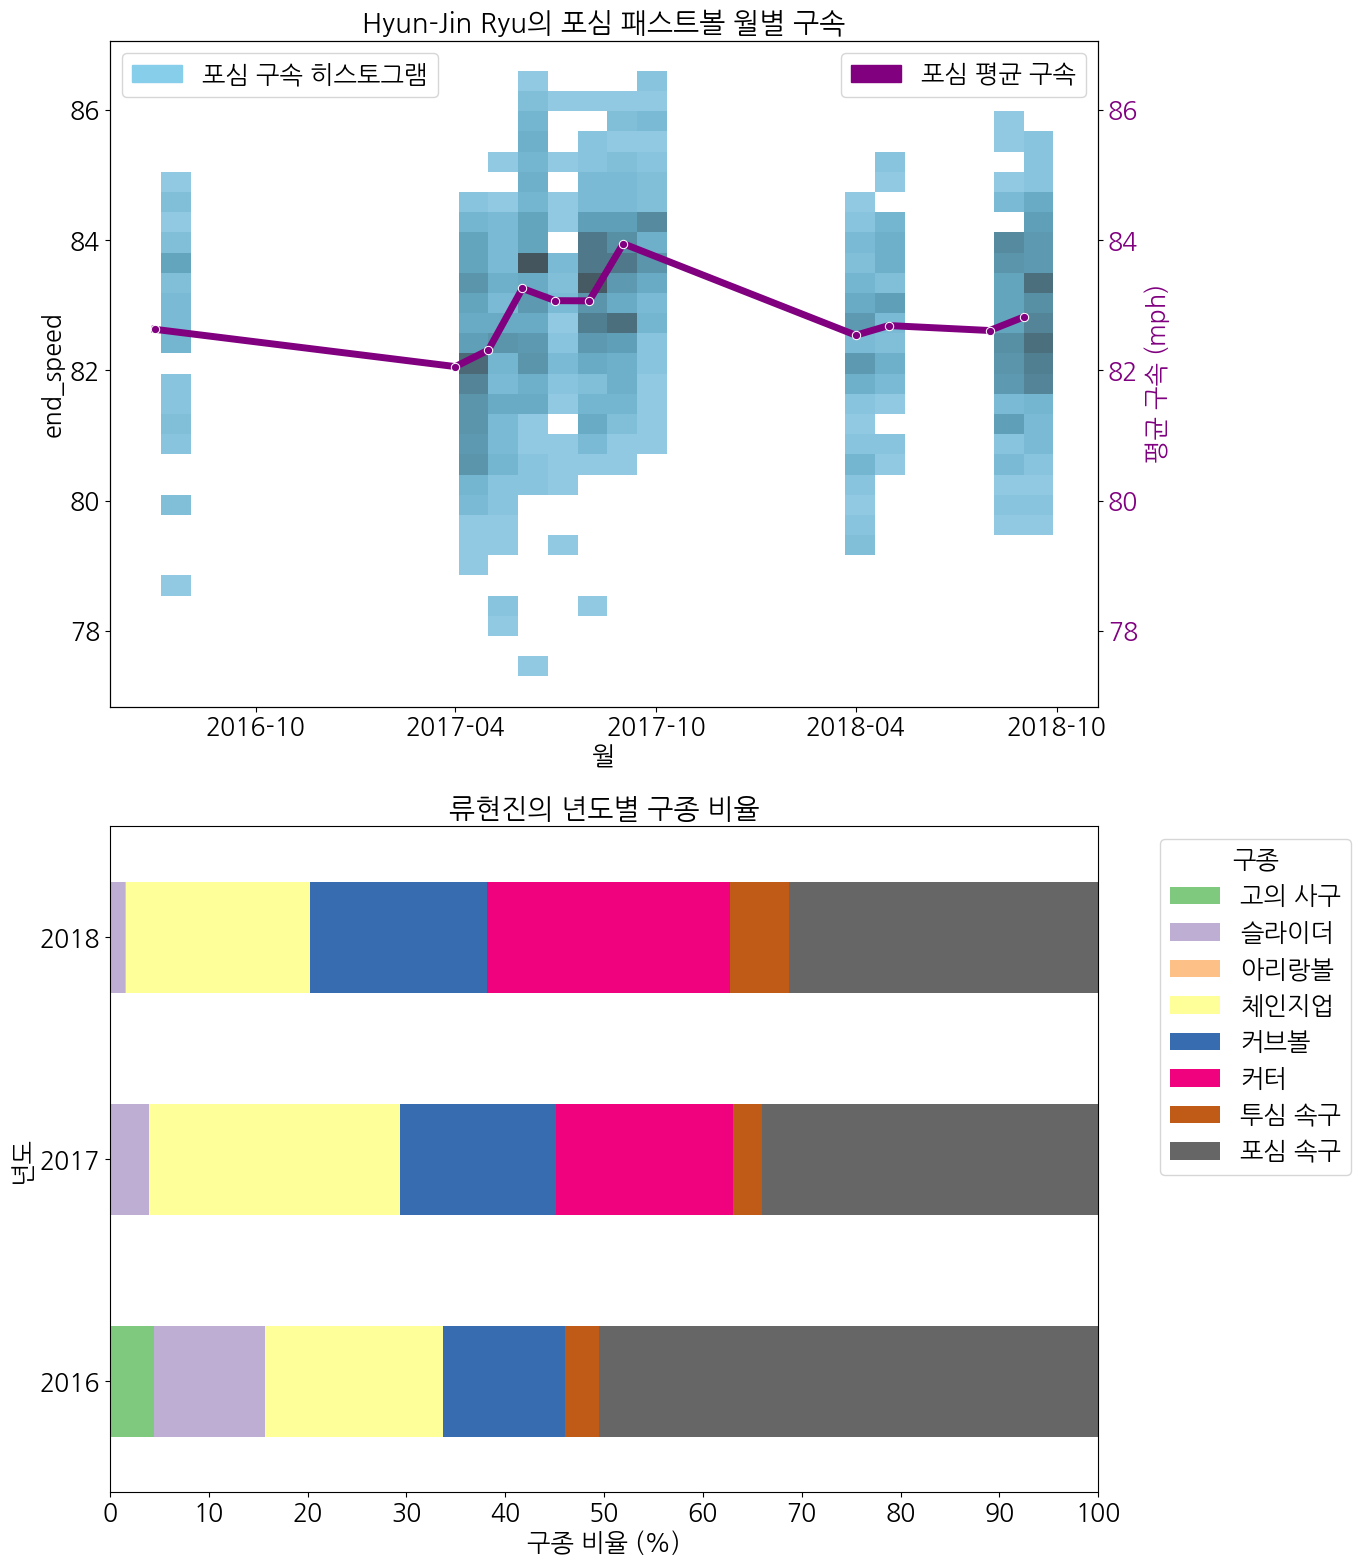

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

def rate_of_pitch_type(ax, name_pitcher):
    df_analyzing_pitcher = df_merged.loc[df_merged.p_name == name_pitcher].copy()
    df_analyzing_pitcher.loc[:, 'year'] = pd.to_datetime(df_analyzing_pitcher.loc[:, 'date']).dt.year

    df_analyzing_pitcher['pitch_type'] = df_analyzing_pitcher['pitch_type'].map(dict_pitch_arsenal)
    
    df_pitch_type_year = df_analyzing_pitcher.groupby(['year', 'pitch_type']).size().unstack(fill_value=0)

    # 구종 비율 계산
    df_pitch_type_year_ratio = df_pitch_type_year.div(df_pitch_type_year.sum(axis=1), axis=0) * 100

    df_pitch_type_year_ratio.plot(kind='barh', stacked=True, ax=ax, colormap='Accent')

    ax.set_title('류현진의 년도별 구종 비율', fontsize=20)
    ax.set_xlabel('구종 비율 (%)')
    ax.set_ylabel('년도')
    ax.set_xlim(0, 100)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='구종', bbox_to_anchor=(1.05, 1), loc='upper left')

def plot_ff_velocity_monthly(ax, name_pitcher):
    df_analyzing_pitcher = df_merged.loc[df_merged.p_name == name_pitcher].copy()
    df_analyzing_pitcher['date'] = pd.to_datetime(df_analyzing_pitcher['date'])
    df_analyzing_pitcher['month'] = df_analyzing_pitcher['date'].dt.to_period('M')
    
    # 포심 패스트볼(FF)만 선택
    df_ff = df_analyzing_pitcher[df_analyzing_pitcher['pitch_type'] == 'FF']
    
    # 월별 구속 데이터
    df_ff_monthly = df_ff.groupby('month')['end_speed'].agg(['mean', 'std', 'count']).reset_index()
    df_ff_monthly['month'] = df_ff_monthly['month'].dt.to_timestamp()
    
    sns.histplot(df_ff, x='date', y='end_speed', bins=30, ax=ax, color='skyblue', kde=False)
    
    ax2 = ax.twinx()
    sns.lineplot(data=df_ff_monthly, x='month', y='mean', ax=ax2, color='purple', marker='o', linewidth=5, label='평균 구속')
    ax2.set_ylabel('평균 구속 (mph)', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')
    ax2.set_ylim(ax.get_ylim())

    # x축의 날짜를 4월과 10월로만 표시
    ax.set_title(f'{name_pitcher}의 포심 패스트볼 월별 구속', fontsize=20)
    ax.set_xlabel('월')
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[4, 10]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    hist_patch = mpatches.Patch(color='skyblue', label='포심 구속 히스토그램')
    line_patch = mpatches.Patch(color='purple', label='포심 평균 구속')
    ax.legend(handles=[hist_patch], loc='upper left')
    ax2.legend(handles=[line_patch], loc='upper right')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# 첫 번째 subplot: 포심 패스트볼 월별 구속
plot_ff_velocity_monthly(ax1, "Hyun-Jin Ryu")
rate_of_pitch_type(ax2, "Hyun-Jin Ryu")

plt.tight_layout()
plt.show()

## 2-2. 구속이 빠른 선수는 직구의 비율이 높다.

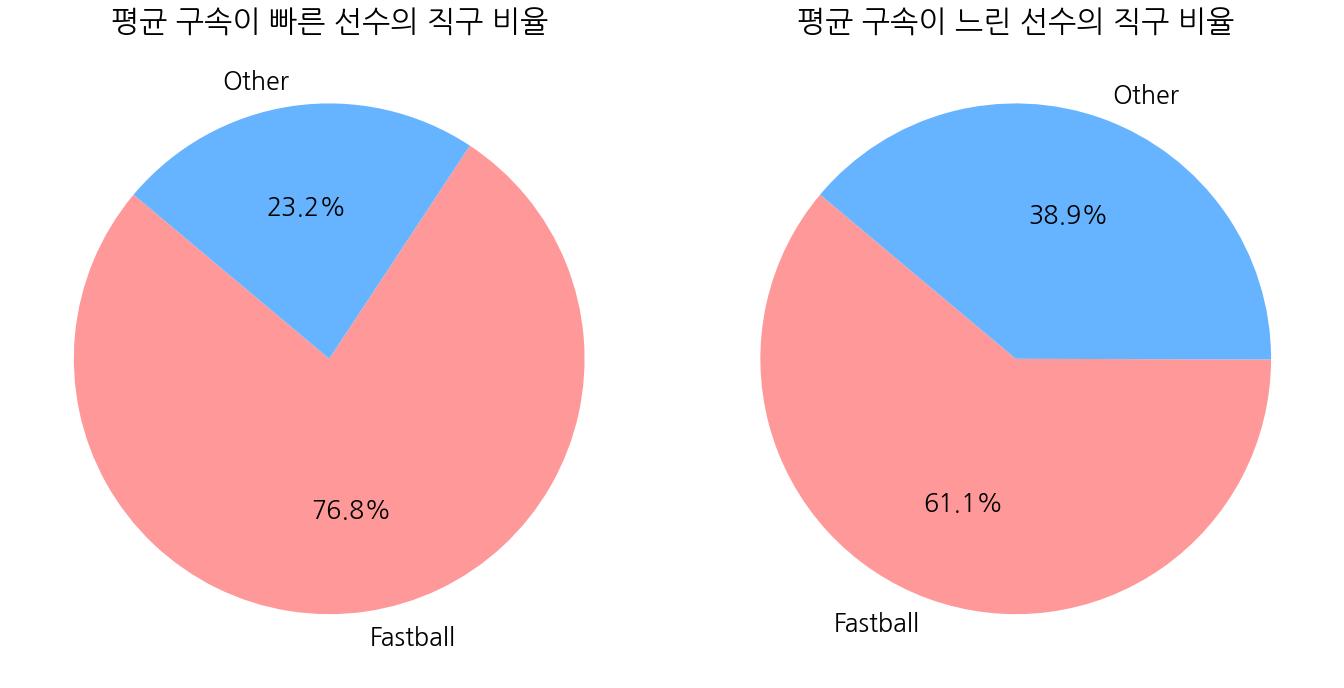

In [23]:
# 직구 구종 (포심, 투심, 싱커, 커터)
fastball_types = ['FF', 'FT', 'SI', 'FC']

def pitch_type_ratio(df, group):
    # 구종 비율 계산
    pitch_counts = df['pitch_type'].value_counts()
    total_pitches = pitch_counts.sum()
    
    fastball_ratio = pitch_counts[fastball_types].sum() / total_pitches * 100
    other_ratio = 100 - fastball_ratio
    
    return [fastball_ratio, other_ratio]

def visualize_pitch_type_ratio(df_merged):
    player_speeds = df_merged.groupby('p_name')['end_speed'].mean().reset_index()
    
    # 87mph = 140 km/h
    low_speed_players = player_speeds[player_speeds['end_speed'] < 87]['p_name']
    high_speed_players = player_speeds[player_speeds['end_speed'] >= 87]['p_name']
    
    df_low_speed = df_merged[df_merged['p_name'].isin(low_speed_players)]
    df_high_speed = df_merged[df_merged['p_name'].isin(high_speed_players)]
    
    # 각 그룹의 구종 비율 계산
    low_speed_ratios = pitch_type_ratio(df_low_speed, 'Low Speed')
    high_speed_ratios = pitch_type_ratio(df_high_speed, 'High Speed')
    
    labels = ['Fastball', 'Other']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    axes[0].pie(high_speed_ratios, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    axes[0].set_title('평균 구속이 빠른 선수의 직구 비율')
    axes[1].pie(low_speed_ratios, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    axes[1].set_title('평균 구속이 느린 선수의 직구 비율')
    
    plt.tight_layout()
    plt.show()

visualize_pitch_type_ratio(df_merged)

## 3. 중앙으로 몰린 공이 홈런으로 이어질 가능성이 크다.

- 전체 선수들의 홈런 핫콜드존

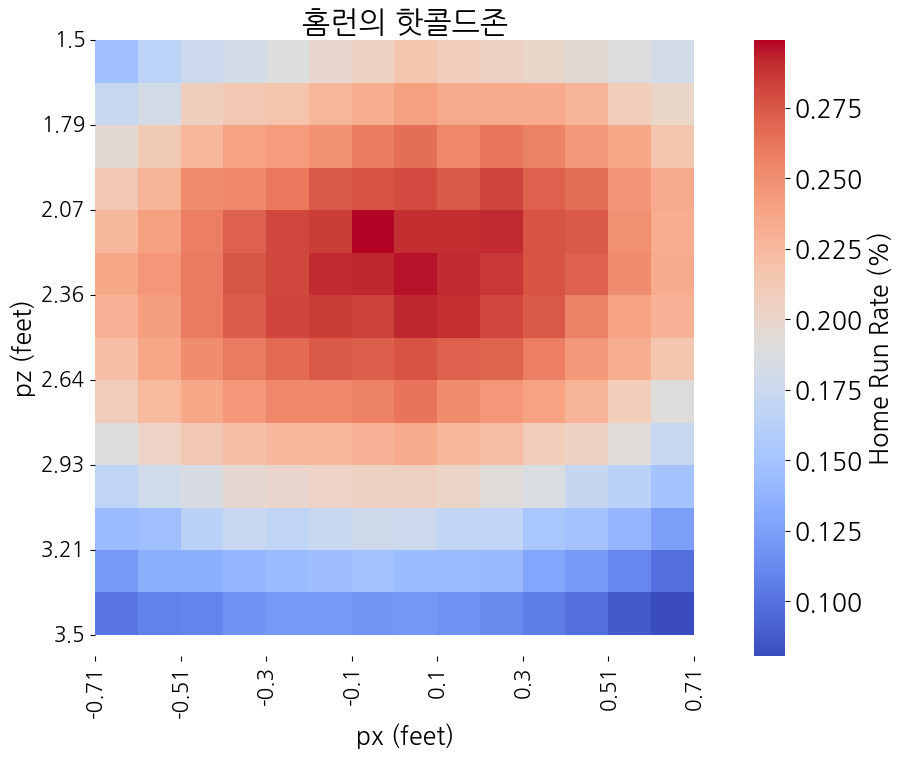

In [24]:
df_home_runs = df_merged[df_merged['event'] == 'Home Run']

# 전체 공 수
total_pitches = len(df_merged)

strike_zone_x = [-0.71, 0.71]
strike_zone_y = [1.5, 3.5]

# 스트라이크 존 내의 공만 필터링
df_home_runs_strike_zone = df_home_runs[(df_home_runs['px'] >= strike_zone_x[0]) & 
                                        (df_home_runs['px'] <= strike_zone_x[1]) & 
                                        (df_home_runs['pz'] >= strike_zone_y[0]) & 
                                        (df_home_runs['pz'] <= strike_zone_y[1])]

# 히트맵 생성 함수
def create_heatmap(df_home_runs_strike_zone, total_pitches, title):
    grid_x = np.linspace(strike_zone_x[0], strike_zone_x[1], 15)
    grid_y = np.linspace(strike_zone_y[0], strike_zone_y[1], 15)
    
    heatmap_data = np.zeros((len(grid_y) - 1, len(grid_x) - 1))
    for i in range(len(grid_x) - 1):
        for j in range(len(grid_y) - 1):
            bin_data = df_home_runs_strike_zone[(df_home_runs_strike_zone['px'] >= grid_x[i]) & 
                                                (df_home_runs_strike_zone['px'] < grid_x[i + 1]) &
                                                (df_home_runs_strike_zone['pz'] >= grid_y[j]) & 
                                                (df_home_runs_strike_zone['pz'] < grid_y[j + 1])]
            if len(bin_data) > 0:
                home_run_rate = len(bin_data) / total_pitches * 100
            else:
                home_run_rate = 0
            heatmap_data[j, i] = home_run_rate

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', xticklabels=np.round(grid_x, 2), yticklabels=np.round(grid_y, 2), cbar_kws={'label': 'Home Run Rate (%)'})
    plt.title(title)
    plt.xlabel('px (feet)')
    plt.ylabel('pz (feet)')

    x_labels = np.round(grid_x, 2)
    plt.xticks(ticks=np.arange(0, len(x_labels), 2), labels=x_labels[::2], fontsize=15)

    y_labels = np.round(grid_y, 2)
    plt.yticks(ticks=np.arange(0, len(y_labels), 2), labels=y_labels[::2], fontsize=15)

    plt.show()

create_heatmap(df_merged, total_pitches,'홈런의 핫콜드존')

## <환경 변수가 야구에 미치는 영향>

## 1. 날씨가 맑을 수록 총 점수가 많이 날 것이다.

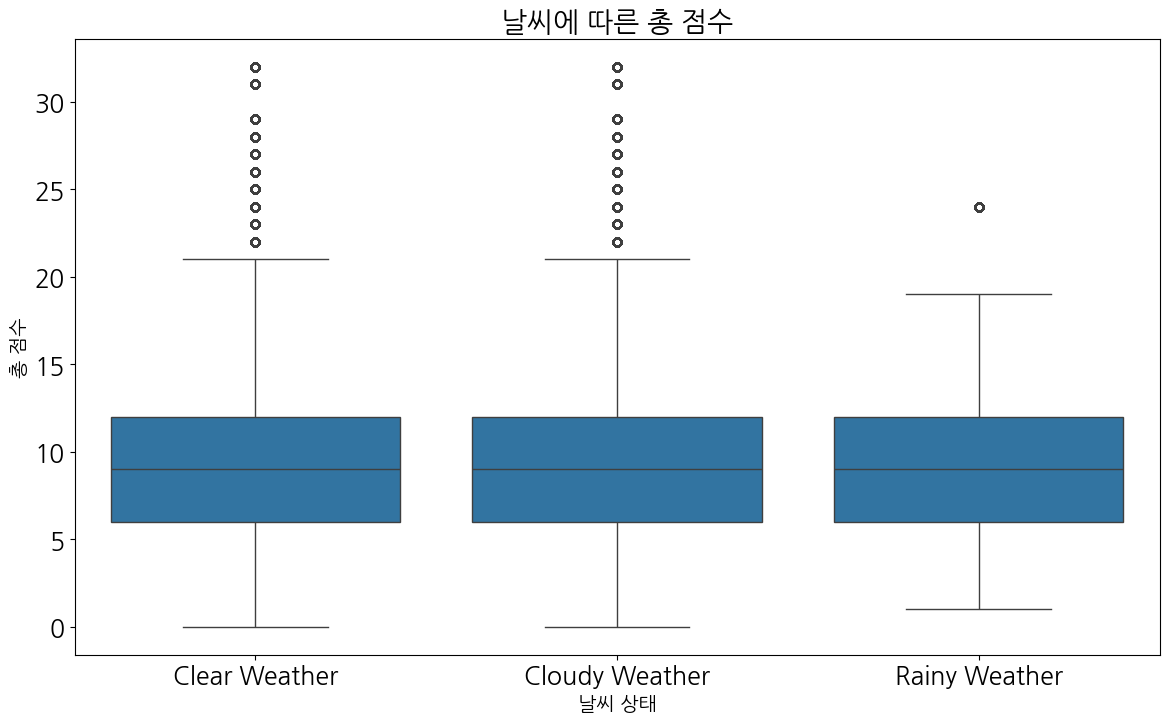

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clear_weather_conditions = ['clear', 'sunny', 'partly cloudy']
cloudy_weather_conditions = ['cloudy', 'overcast', 'roof closed']
rainy_weather_conditions = ['rain', 'drizzle', 'snow']

df_merged['weather'] = df_merged['weather'].str.lower()

# 날씨 조건에 따른 필터링
clear_weather = df_merged[df_merged['weather'].str.contains('|'.join(clear_weather_conditions))].copy()
cloudy_weather = df_merged[df_merged['weather'].str.contains('|'.join(cloudy_weather_conditions))].copy()
rainy_weather = df_merged[df_merged['weather'].str.contains('|'.join(rainy_weather_conditions))].copy()

clear_weather.loc[:, 'total_score'] = clear_weather['away_final_score'] + clear_weather['home_final_score']
cloudy_weather.loc[:, 'total_score'] = cloudy_weather['away_final_score'] + cloudy_weather['home_final_score']
rainy_weather.loc[:, 'total_score'] = rainy_weather['away_final_score'] + rainy_weather['home_final_score']

clear_weather.loc[:, 'weather_condition'] = 'Clear Weather'
cloudy_weather.loc[:, 'weather_condition'] = 'Cloudy Weather'
rainy_weather.loc[:, 'weather_condition'] = 'Rainy Weather'
merged_df = pd.concat([clear_weather, cloudy_weather, rainy_weather])

plt.figure(figsize=(14, 8))
sns.boxplot(x='weather_condition', y='total_score', data=merged_df)

plt.title('날씨에 따른 총 점수', fontsize=20)
plt.xlabel('날씨 상태', fontsize=14)
plt.ylabel('총 점수', fontsize=14)
plt.show()

In [26]:
clear_weather_count, cloudy_weather_count, rainy_weather_count = len(clear_weather), len(cloudy_weather), len(rainy_weather)
print(clear_weather_count, cloudy_weather_count, rainy_weather_count)


1709425 1878310 37178


### 1-1. 온도가 평이할 수록 총 점수가 많이 날 것이다.

/var/folders/lq/r5rczf855lzfvdjjpdnm0xg80000gn/T/ipykernel_15973/3341430406.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='temperature_c', y='total_score', data=temperature_score_df, palette='coolwarm', ax=ax1)


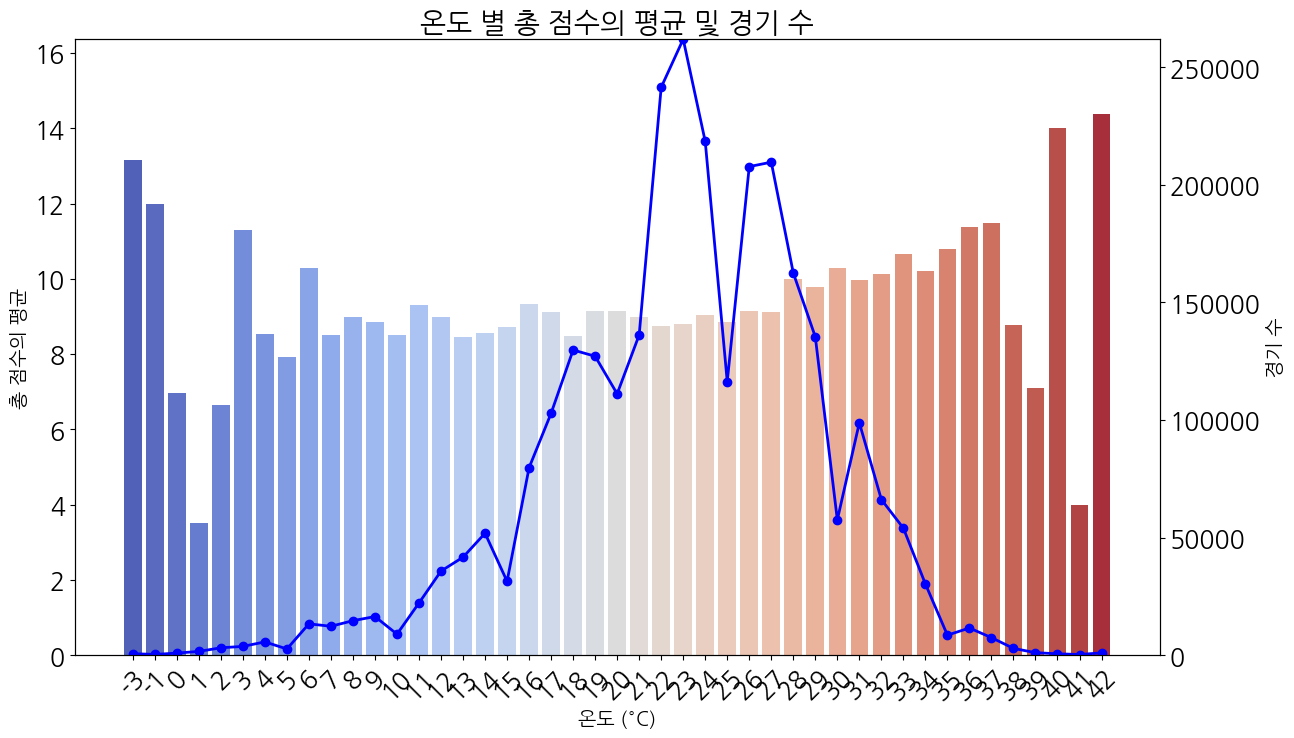

In [27]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

def extract_temperature(weather_str):
    match = re.search(r'(\d+) degrees', weather_str)
    if match:
        return int(match.group(1))
    return np.nan

# 소문자로 변경
df_merged['temperature_f'] = df_merged['weather'].apply(lambda x: extract_temperature(str(x).lower()))

# 화씨를 섭씨로 변환
def fahrenheit_to_celsius(f):
    return (f - 32) * 5.0/9.0
    
df_merged['temperature_c'] = df_merged['temperature_f'].apply(lambda x: fahrenheit_to_celsius(x) if not pd.isnull(x) else np.nan)
df_merged['temperature_c'] = df_merged['temperature_c'].round(0).astype('Int64')  # 소수점 없이 표시

# 총 점수
df_merged['total_score'] = df_merged['away_final_score'] + df_merged['home_final_score']

# 온도별 점수 평균과 데이터 수 계산
temperature_score_df = df_merged.groupby('temperature_c').agg({'total_score': 'mean', 'temperature_f': 'size'}).reset_index()
temperature_score_df.rename(columns={'temperature_f': 'count'}, inplace=True)

# 온도를 정렬
temperature_score_df = temperature_score_df.sort_values('temperature_c')

fig, ax1 = plt.subplots(figsize=(14, 8))

# 막대 그래프
bar_plot = sns.barplot(x='temperature_c', y='total_score', data=temperature_score_df, palette='coolwarm', ax=ax1)
ax1.set_title('온도 별 총 점수의 평균 및 경기 수', fontsize=20)
ax1.set_xlabel('온도 (°C)', fontsize=14)
ax1.set_ylabel('총 점수의 평균', fontsize=14)
ax1.set_ylim(0, temperature_score_df['total_score'].max() + 2)

# 막대 그래프의 위치를 저장
bar_locs = bar_plot.patches
bar_x = [p.get_x() + p.get_width() / 2 for p in bar_locs]

# 경기 수 라인 그래프
ax2 = ax1.twinx()
ax2.plot(bar_x, temperature_score_df['count'], color='blue', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('경기 수', fontsize=14)
ax2.set_ylim(0, temperature_score_df['count'].max() + 5)

# x축 라벨 설정
ax1.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
ax1.set_xticks(bar_x)
ax1.set_xticklabels(temperature_score_df['temperature_c'], rotation=45)

plt.show()


### 1-2. 낮 경기가 경기 시간이 더 길 것이다.

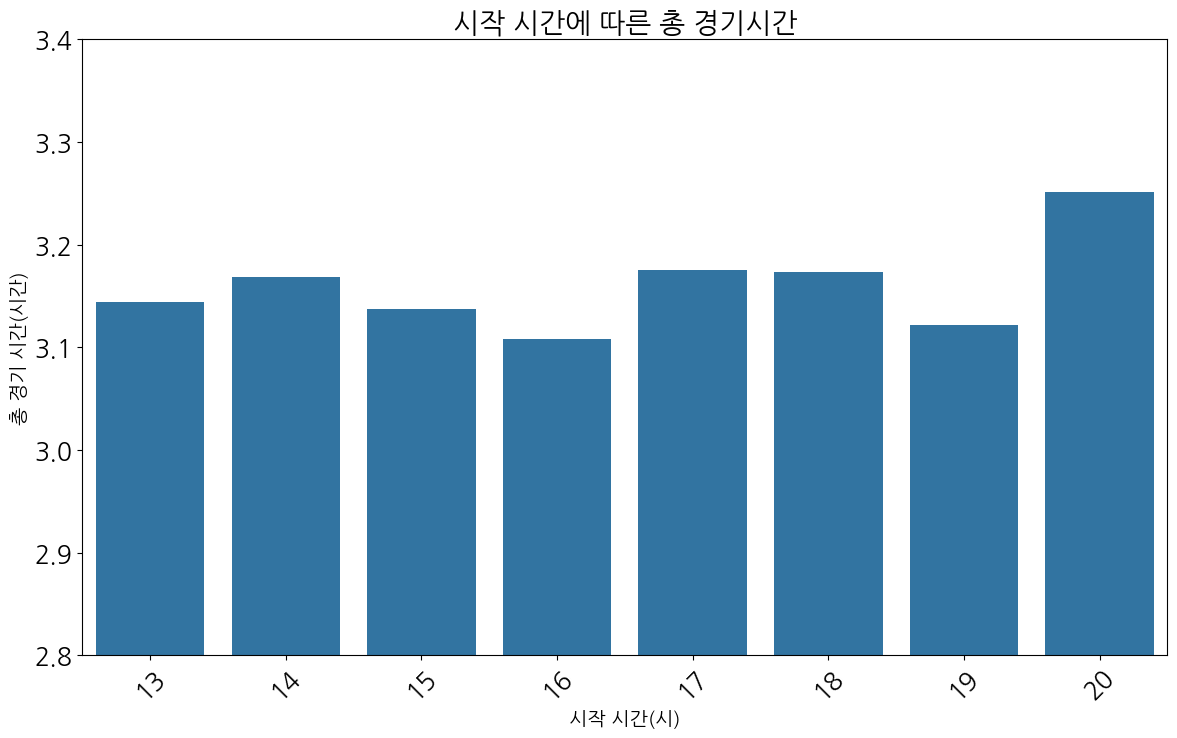

In [28]:
# 낮 경기 필터링을 위한 시간 추출 함수
def extract_hour(start_time_str):
    match = re.search(r'(\d+):\d+ (AM|PM)', start_time_str)
    if match:
        hour = int(match.group(1))
        period = match.group(2)
        if period == 'PM' and hour != 12:
            hour += 12
        if period == 'AM' and hour == 12:
            hour = 0
        return hour
    return np.nan

df_merged['start_hour'] = df_merged['start_time'].apply(lambda x: extract_hour(str(x)))

df_merged['elapsed_time_hours'] = df_merged['elapsed_time'] / 60

df_filtered = df_merged[(df_merged['start_hour'] >= 13) & (df_merged['start_hour'] <= 20)]

start_time_avg_duration = df_filtered.groupby('start_hour')['elapsed_time_hours'].mean().reset_index()

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='start_hour', y='elapsed_time_hours', data=start_time_avg_duration)

plt.title('시작 시간에 따른 총 경기시간', fontsize=20)
plt.xlabel('시작 시간(시)', fontsize=14)
plt.ylabel('총 경기 시간(시간)', fontsize=14)
plt.ylim(2.8, 3.3)
plt.yticks(np.arange(2.8, 3.4, 0.1))
plt.xticks(rotation=45)
plt.show()

### 2. 바람의 강도와 방향은 출루에 영향을 줄 것 이다.

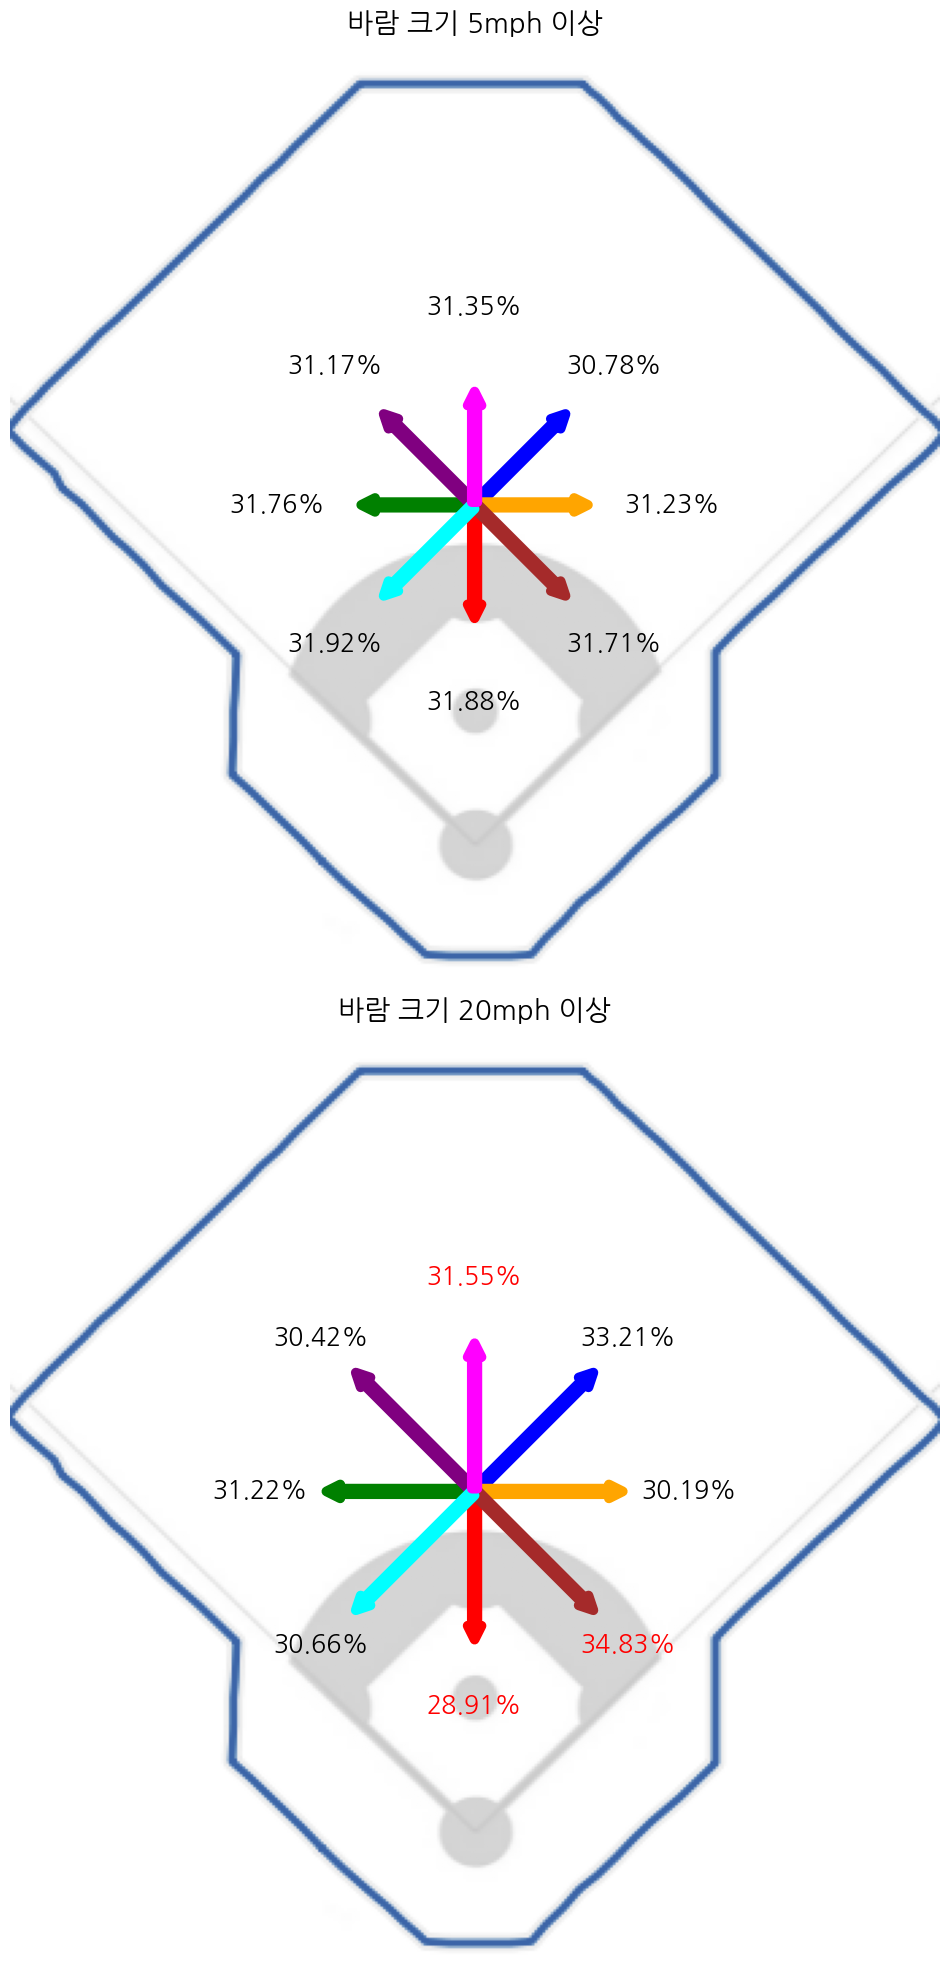

In [29]:
from matplotlib.patches import FancyArrowPatch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

def extract_wind_info(wind_str):
    match = re.search(r'(\d+) mph, (.+)', wind_str)
    if match:
        speed = int(match.group(1))
        direction = match.group(2)
        return speed, direction
    return np.nan, np.nan

df_merged['wind_speed'], df_merged['wind_direction'] = zip(*df_merged['wind'].apply(lambda x: extract_wind_info(str(x))))

events_to_include = ['Walk', 'Single', 'Double', 'Triple', 'Home Run']

def calculate_on_base_rate(df, direction):
    filtered_df = df[df['wind_direction'] == direction]
    on_base_events = filtered_df['event'].isin(events_to_include).sum()
    total_events = len(filtered_df)
    if total_events > 0:
        return on_base_events / total_events
    return 0

def generate_direction_coords(scale_factor):
    return {
        'In from CF': [(0, 0, 0, -0.5 * scale_factor)],
        'Out to RF': [(0, 0, 0.4 * scale_factor, 0.4 * scale_factor)],
        'R to L': [(0, 0, -0.5 * scale_factor, 0)],
        'L to R': [(0, 0, 0.5 * scale_factor, 0)],
        'Out to LF': [(0, 0, -0.4 * scale_factor, 0.4 * scale_factor)],
        'In from LF': [(0, 0, 0.4 * scale_factor, -0.4 * scale_factor)],
        'In from RF': [(0, 0, -0.4 * scale_factor, -0.4 * scale_factor)],
        'Out to CF': [(0, 0, 0, 0.5 * scale_factor)]
    }

# 볼드체로 설정할 출루율 문구를 정의
red_rates = ['28.91%', '31.55%','34.83%']

def plot_wind_effects(wind_speed_threshold, subplot_position, title):
    df_filtered = df_merged[(df_merged['wind_speed'] >= wind_speed_threshold) & (df_merged['wind_direction'] != 'Varies')]
    directions = df_filtered['wind_direction'].unique()
    on_base_rates = {direction: calculate_on_base_rate(df_filtered, direction) for direction in directions}

    scale_factor = 0.7 - (1 / wind_speed_threshold)
    direction_coords = generate_direction_coords(scale_factor)

    for direction, coords in direction_coords.items():
        if direction in on_base_rates:
            rate = on_base_rates[direction]
            for i, (x_start, y_start, x_end, y_end) in enumerate(coords):
                arrow = FancyArrowPatch((x_start, y_start), (x_end, y_end), mutation_scale=20, color=direction_colors[direction], linewidth=7)
                ax[subplot_position].add_patch(arrow)
                text_x_offset, text_y_offset = text_coords.get(direction, (0, 0))
                rate_str = f'{rate:.2%}'
                text_color = 'red' if rate_str in red_rates else 'black'
                ax[subplot_position].text((x_start + x_end) / 2 + text_x_offset, (y_start + y_end) / 2 + text_y_offset, f'{rate:.2%}', fontsize=18, color=text_color, ha='center', va='center')
    ax[subplot_position].set_title(title, fontsize=20)
    ax[subplot_position].axis('off')
    ax[subplot_position].imshow(img, extent=[-1, 1, -1, 1])

img_path = '/Users/icebear/Desktop/workspace/ML-study/baseball_stadium.png'
img = plt.imread(img_path)

direction_colors = {
    'In from CF': 'red',
    'Out to RF': 'blue',
    'R to L': 'green',
    'L to R': 'orange',
    'Out to LF': 'purple',
    'In from LF': 'brown',
    'In from RF': 'cyan',
    'Out to CF': 'magenta'
}

# 각 방향의 텍스트 위치를 개별적으로 조정할 수 있는 설정
text_coords = {
    'In from CF': (0, -0.3),
    'Out to RF': (0.2, 0.2),
    'R to L': (-0.3, 0),
    'L to R': (0.3, 0),
    'Out to LF': (-0.2, 0.2),
    'In from LF': (0.2, -0.2),
    'In from RF': (-0.2, -0.2),
    'Out to CF': (0, 0.3)
}

fig, ax = plt.subplots(2, 1, figsize=(10, 20))

plot_wind_effects(20, 1, '바람 크기 20mph 이상')
plot_wind_effects(5, 0, '바람 크기 5mph 이상')

plt.tight_layout()
plt.show()

### 2-1. 좌익수로 부터 불어오는 풍향의 출루율은 우타자와의 몸쪽 공 승부와 관련이 있다. (우타자에게 유리할 것이다)

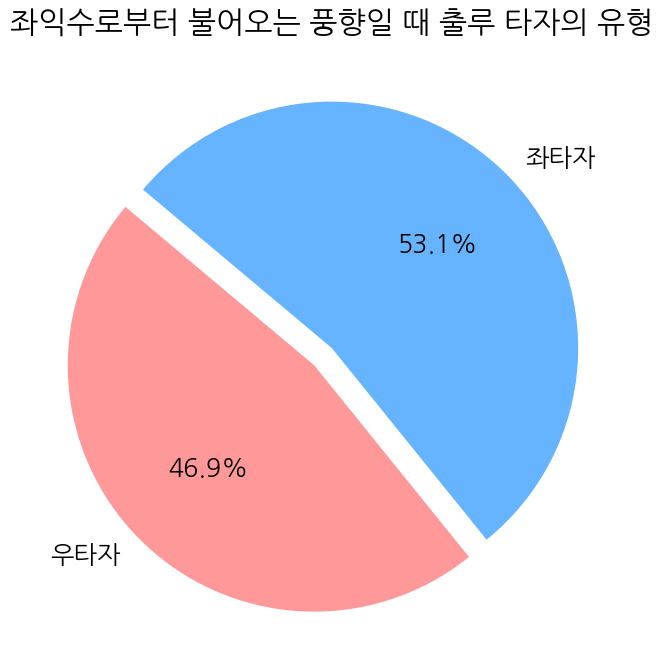

In [30]:
from matplotlib.patches import FancyArrowPatch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

def extract_wind_info(wind_str):
    match = re.search(r'(\d+) mph, (.+)', wind_str)
    if match:
        speed = int(match.group(1))
        direction = match.group(2)
        return speed, direction
    return np.nan, np.nan

# 풍속과 방향을 새로운 열로 추가
df_merged['wind_speed'], df_merged['wind_direction'] = zip(*df_merged['wind'].apply(lambda x: extract_wind_info(str(x))))

events_to_include = ['Walk', 'Single', 'Double', 'Triple', 'Home Run']

# 출루율 계산 (지정한 이벤트 비율)
def calculate_on_base_rate(df, direction):
    filtered_df = df[df['wind_direction'] == direction]
    on_base_events = filtered_df['event'].isin(events_to_include).sum()
    total_events = len(filtered_df)
    if total_events > 0:
        return on_base_events / total_events
    return 0

# 우타자와 좌타자의 출루율 계산
def calculate_on_base_rate_by_batter(df, direction):
    filtered_df = df[(df['wind_direction'] == direction) & (df['wind_speed'] >= 20)]
    right_batters = filtered_df[filtered_df['stand'] == 'R']
    left_batters = filtered_df[filtered_df['stand'] == 'L']
    
    right_on_base_events = right_batters['event'].isin(events_to_include).sum()
    left_on_base_events = left_batters['event'].isin(events_to_include).sum()
    
    total_right_events = len(right_batters)
    total_left_events = len(left_batters)
    
    right_on_base_rate = right_on_base_events / total_right_events if total_right_events > 0 else 0
    left_on_base_rate = left_on_base_events / total_left_events if total_left_events > 0 else 0
    
    return right_on_base_rate, left_on_base_rate

# 'In from RF' 방향의 출루율 계산
right_on_base_rate, left_on_base_rate = calculate_on_base_rate_by_batter(df_merged, 'In from LF')

# 우타자와 좌타자의 비율을 원그래프로 시각화
labels = ['우타자', '좌타자']
sizes = [right_on_base_rate, left_on_base_rate]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # 우타자의 비율을 강조하기 위해 조정

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('좌익수로부터 불어오는 풍향일 때 출루 타자의 유형')
plt.show()

### 2-2. 전체 투수들의 몸쪽 공 승부 비율이 적다?

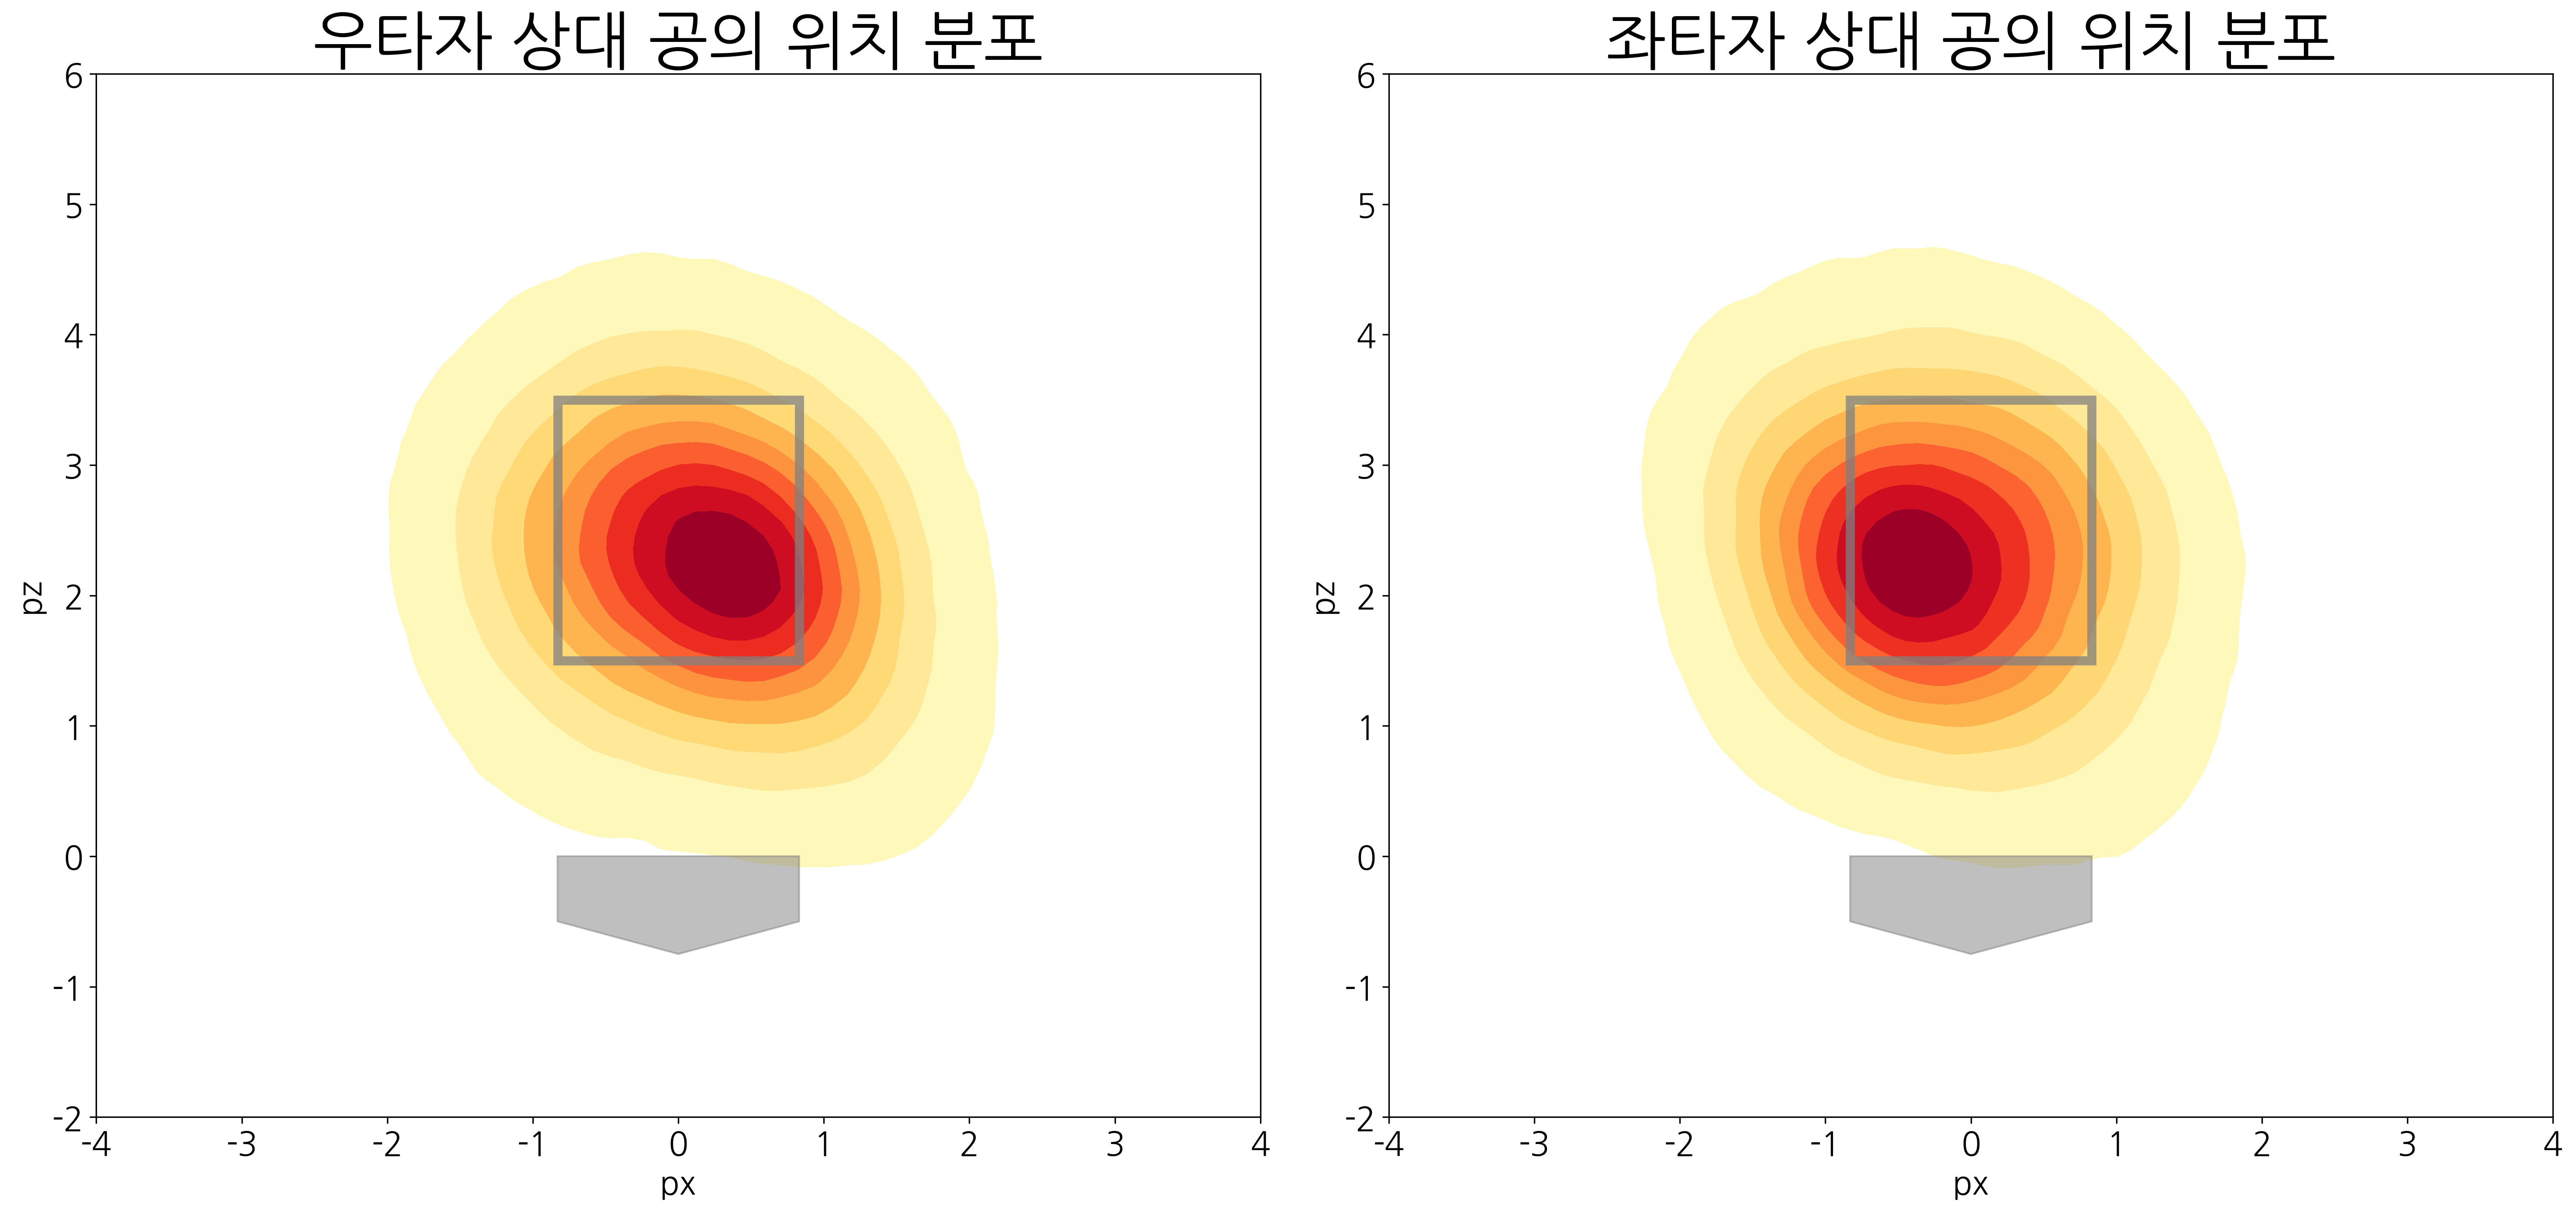

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Rectangle

plt.rcParams['font.family'] = 'NanumGothic'

%matplotlib inline

strike_zone_x = [-0.83, 0.83]
strike_zone_y = [1.5, 3.5]
strike_zone_width = strike_zone_x[1] - strike_zone_x[0]
strike_zone_height = strike_zone_y[1] - strike_zone_y[0]

def plot_location_of_pitches_kde_all():
    df_rhb = df_merged.loc[df_merged.stand == 'R']  # 우타자 상대 공
    df_lhb = df_merged.loc[df_merged.stand == 'L']  # 좌타자 상대 공
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=300, facecolor="white")

    # 우타자 상대 공 분포
    sns.kdeplot(
        data=df_rhb,
        x='px', y='pz',
        cmap='YlOrRd', fill=True,
        ax=axes[0],
        warn_singular=False
    )

    axes[0].set_xlim(-4, 4)
    axes[0].set_ylim(-2, 6)

    axes[0].set_xticks(range(-4, 5))
    axes[0].set_yticks(range(-2, 7))

    ## 홈 플레이트 패치
    axes[0].add_patch(
        plt.Polygon(
            [[0, -0.75],
             [strike_zone_x[1], -0.5],
             [strike_zone_x[1], 0],
             [strike_zone_x[0], 0],
             [strike_zone_x[0], -0.5]],
            color="grey", fill=True,
            alpha=0.5
        )
    )

    # 스트라이크존 패치
    axes[0].add_patch(
        Rectangle(
            (strike_zone_x[0], strike_zone_y[0]),
            strike_zone_width, strike_zone_height,
            linewidth=5,
            edgecolor='grey', facecolor='none',
            alpha=0.75
        )
    )

    axes[0].set_title(f"우타자 상대 공의 위치 분포", fontsize=35)

    # 좌타자 상대 공 분포
    sns.kdeplot(
        data=df_lhb,
        x='px', y='pz',
        cmap='YlOrRd', fill=True,
        ax=axes[1],
        warn_singular=False
    )

    axes[1].set_xlim(-4, 4)
    axes[1].set_ylim(-2, 6)

    axes[1].set_xticks(range(-4, 5))
    axes[1].set_yticks(range(-2, 7))

    ## 홈 플레이트 패치
    axes[1].add_patch(
        plt.Polygon(
            [[0, -0.75],
             [strike_zone_x[1], -0.5],
             [strike_zone_x[1], 0],
             [strike_zone_x[0], 0],
             [strike_zone_x[0], -0.5]],
            color="grey", fill=True,
            alpha=0.5
        )
    )

    # 스트라이크존 패치
    axes[1].add_patch(
        Rectangle(
            (strike_zone_x[0], strike_zone_y[0]),
            strike_zone_width, strike_zone_height,
            linewidth=5,
            edgecolor='grey', facecolor='none',
            alpha=0.75
        )
    )

    axes[1].set_title(f"좌타자 상대 공의 위치 분포", fontsize=35)

    plt.tight_layout(rect=[0, 0.03, 1, 0.99])
    plt.show()

plot_location_of_pitches_kde_all()